In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('./Данные/data_new.csv')
data.columns = data.columns.str.replace('[<,>]', '')
data

C:\Users\tosha\AppData\Local\Temp/ipykernel_1088/343028308.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[<,>]', '')


,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,CBOM,60,20150701,110000,3.6270000,3.6300000,3.6260000,3.6290000,612600
1,CBOM,60,20150701,120000,3.6290000,3.6300000,3.6240000,3.6240000,105200
2,CBOM,60,20150701,130000,3.6240000,3.6290000,3.6240000,3.6250000,76500
3,CBOM,60,20150701,140000,3.6250000,3.6290000,3.6250000,3.6250000,47200
4,CBOM,60,20150701,150000,3.6290000,3.6335000,3.6250000,3.6335000,547900
...,...,...,...,...,...,...,...,...,...
1214504,YNDX,60,20220201,200000,3710.8000000,3761.6000000,3702.0000000,3717.0000000,118464
1214505,YNDX,60,20220201,210000,3716.0000000,3717.2000000,3683.0000000,3707.0000000,89503
1214506,YNDX,60,20220201,220000,3706.2000000,3729.4000000,3680.0000000,3688.2000000,92693
1214507,YNDX,60,20220201,230000,3687.6000000,3695.6000000,3676.8000000,3682.8000000,59790


In [22]:
data = data.drop(data.loc[data.TICKER=='<TICKER>'].index).reset_index(drop=True)
data

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,CBOM,60,20150701,110000,3.6270000,3.6300000,3.6260000,3.6290000,612600
1,CBOM,60,20150701,120000,3.6290000,3.6300000,3.6240000,3.6240000,105200
2,CBOM,60,20150701,130000,3.6240000,3.6290000,3.6240000,3.6250000,76500
3,CBOM,60,20150701,140000,3.6250000,3.6290000,3.6250000,3.6250000,47200
4,CBOM,60,20150701,150000,3.6290000,3.6335000,3.6250000,3.6335000,547900
...,...,...,...,...,...,...,...,...,...
1214407,YNDX,60,20220201,200000,3710.8000000,3761.6000000,3702.0000000,3717.0000000,118464
1214408,YNDX,60,20220201,210000,3716.0000000,3717.2000000,3683.0000000,3707.0000000,89503
1214409,YNDX,60,20220201,220000,3706.2000000,3729.4000000,3680.0000000,3688.2000000,92693
1214410,YNDX,60,20220201,230000,3687.6000000,3695.6000000,3676.8000000,3682.8000000,59790


In [23]:
data.loc[(data.TICKER == 'GAZP') & (data.DATE.str[3]=='0'), 'DATE']

18799     20100201
18800     20100201
18801     20100201
18802     20100201
18803     20100201
            ...   
371520    01/02/22
371521    01/02/22
371522    01/02/22
371523    01/02/22
371524    02/02/22
Name: DATE, Length: 29708, dtype: object

In [4]:
data.loc[(data.DATE.str[2]=='/'), 'TICKER'].unique()

array(['DSKY', 'GAZP', 'MTSS'], dtype=object)

In [24]:
data = data.drop(data.loc[data.DATE.str[2]=='/'].index).reset_index(drop=True)
data

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,CBOM,60,20150701,110000,3.6270000,3.6300000,3.6260000,3.6290000,612600
1,CBOM,60,20150701,120000,3.6290000,3.6300000,3.6240000,3.6240000,105200
2,CBOM,60,20150701,130000,3.6240000,3.6290000,3.6240000,3.6250000,76500
3,CBOM,60,20150701,140000,3.6250000,3.6290000,3.6250000,3.6250000,47200
4,CBOM,60,20150701,150000,3.6290000,3.6335000,3.6250000,3.6335000,547900
...,...,...,...,...,...,...,...,...,...
1142420,YNDX,60,20220201,200000,3710.8000000,3761.6000000,3702.0000000,3717.0000000,118464
1142421,YNDX,60,20220201,210000,3716.0000000,3717.2000000,3683.0000000,3707.0000000,89503
1142422,YNDX,60,20220201,220000,3706.2000000,3729.4000000,3680.0000000,3688.2000000,92693
1142423,YNDX,60,20220201,230000,3687.6000000,3695.6000000,3676.8000000,3682.8000000,59790


In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data['YEAR'] = data.DATE.str[:4]
data['MONTH'] = data.DATE.str[4:6]
data['DAY'] = data.DATE.str[6:]
data['HOUR'] = data.TIME.str[:2]
data = data.sort_values(['TICKER', 'DATE', 'TIME']).reset_index(drop=True).drop(['PER', 'TIME'], axis=1)
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR
0,AFKS,20100201,26.9190000,27.0710000,26.7140000,27.0710000,44400,2010,02,01,11
1,AFKS,20100201,26.8700000,26.9500000,26.6000000,26.7290000,40900,2010,02,01,12
2,AFKS,20100201,26.7290000,26.9990000,26.6900000,26.8990000,108700,2010,02,01,13
3,AFKS,20100201,26.8980000,26.8980000,26.7700000,26.7900000,14200,2010,02,01,14
4,AFKS,20100201,26.7900000,26.8500000,26.7070000,26.7070000,151800,2010,02,01,15
...,...,...,...,...,...,...,...,...,...,...,...
1094711,YNDX,20220201,3710.8000000,3761.6000000,3702.0000000,3717.0000000,118464,2022,02,01,20
1094712,YNDX,20220201,3716.0000000,3717.2000000,3683.0000000,3707.0000000,89503,2022,02,01,21
1094713,YNDX,20220201,3706.2000000,3729.4000000,3680.0000000,3688.2000000,92693,2022,02,01,22
1094714,YNDX,20220201,3687.6000000,3695.6000000,3676.8000000,3682.8000000,59790,2022,02,01,23


In [27]:
data = data.drop(data.loc[data.TICKER.isin(['MVID', 'RNFT', 'SFIN', 'LNTA', 'UPRO', 'LSRG'])].index).reset_index(drop=True)
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR
0,AFKS,20100201,26.9190000,27.0710000,26.7140000,27.0710000,44400,2010,02,01,11
1,AFKS,20100201,26.8700000,26.9500000,26.6000000,26.7290000,40900,2010,02,01,12
2,AFKS,20100201,26.7290000,26.9990000,26.6900000,26.8990000,108700,2010,02,01,13
3,AFKS,20100201,26.8980000,26.8980000,26.7700000,26.7900000,14200,2010,02,01,14
4,AFKS,20100201,26.7900000,26.8500000,26.7070000,26.7070000,151800,2010,02,01,15
...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,20220201,3710.8000000,3761.6000000,3702.0000000,3717.0000000,118464,2022,02,01,20
973450,YNDX,20220201,3716.0000000,3717.2000000,3683.0000000,3707.0000000,89503,2022,02,01,21
973451,YNDX,20220201,3706.2000000,3729.4000000,3680.0000000,3688.2000000,92693,2022,02,01,22
973452,YNDX,20220201,3687.6000000,3695.6000000,3676.8000000,3682.8000000,59790,2022,02,01,23


In [9]:
data.TICKER.nunique()

43

In [18]:
data.loc[data.DATE=='20211203'].TICKER.nunique()

43

In [19]:
data.OPEN.max()

'9999.9000000'

In [90]:
import sys
sys.maxsize

9223372036854775807

In [28]:
data[['OPEN', 'HIGH', 'LOW', 'CLOSE']] = data[['OPEN', 'HIGH', 'LOW', 'CLOSE']].astype('float32')
data['VOL'] = data['VOL'].astype('int64')
data['YEAR'] = data['YEAR'].astype('uint16')
data[['MONTH', 'DAY', 'HOUR']] = data[['MONTH', 'DAY', 'HOUR']].astype('uint8')
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR
0,AFKS,20100201,26.919001,27.070999,26.714001,27.070999,44400,2010,2,1,11
1,AFKS,20100201,26.870001,26.950001,26.600000,26.729000,40900,2010,2,1,12
2,AFKS,20100201,26.729000,26.999001,26.690001,26.899000,108700,2010,2,1,13
3,AFKS,20100201,26.898001,26.898001,26.770000,26.790001,14200,2010,2,1,14
4,AFKS,20100201,26.790001,26.850000,26.707001,26.707001,151800,2010,2,1,15
...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,20220201,3710.800049,3761.600098,3702.000000,3717.000000,118464,2022,2,1,20
973450,YNDX,20220201,3716.000000,3717.199951,3683.000000,3707.000000,89503,2022,2,1,21
973451,YNDX,20220201,3706.199951,3729.399902,3680.000000,3688.199951,92693,2022,2,1,22
973452,YNDX,20220201,3687.600098,3695.600098,3676.800049,3682.800049,59790,2022,2,1,23


In [27]:
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP
0,AFKS,20100201,26.919001,27.070999,26.714001,27.070999,44400,2010.0,2.0,1.0,11,0,2010.02.01.011
1,AFKS,20100201,26.870001,26.950001,26.600000,26.729000,40900,2010.0,2.0,1.0,12,0,2010.02.01.012
2,AFKS,20100201,26.729000,26.999001,26.690001,26.899000,108700,2010.0,2.0,1.0,13,0,2010.02.01.013
3,AFKS,20100201,26.898001,26.898001,26.770000,26.790001,14200,2010.0,2.0,1.0,14,0,2010.02.01.014
4,AFKS,20100201,26.790001,26.850000,26.707001,26.707001,151800,2010.0,2.0,1.0,15,0,2010.02.01.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,20220201,3710.800049,3761.600098,3702.000000,3717.000000,118464,2022.0,2.0,1.0,20,1,2022.02.01.020
973450,YNDX,20220201,3716.000000,3717.199951,3683.000000,3707.000000,89503,2022.0,2.0,1.0,21,1,2022.02.01.021
973451,YNDX,20220201,3706.199951,3729.399902,3680.000000,3688.199951,92693,2022.0,2.0,1.0,22,1,2022.02.01.022
973452,YNDX,20220201,3687.600098,3695.600098,3676.800049,3682.800049,59790,2022.0,2.0,1.0,23,1,2022.02.01.023


In [29]:
data.loc[data.HOUR==0, 'HOUR'] = 24
data.loc[data.HOUR==24, 'DAY'] = data.DAY.shift()
data.loc[data.HOUR==24, 'MONTH'] = data.MONTH.shift()
data.loc[data.HOUR==24, 'YEAR'] = data.YEAR.shift()

In [30]:
data['TIMESTAMP'] = data.YEAR.astype('int32').astype('str')+data.MONTH.astype('int32').astype('str')+data.DAY.astype('int32').astype('str')+data.HOUR.astype('str')
data['WEEKDAY'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY']]).dt.weekday
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,TIMESTAMP,WEEKDAY
0,AFKS,20100201,26.919001,27.070999,26.714001,27.070999,44400,2010.0,2.0,1.0,11,20102111,0
1,AFKS,20100201,26.870001,26.950001,26.600000,26.729000,40900,2010.0,2.0,1.0,12,20102112,0
2,AFKS,20100201,26.729000,26.999001,26.690001,26.899000,108700,2010.0,2.0,1.0,13,20102113,0
3,AFKS,20100201,26.898001,26.898001,26.770000,26.790001,14200,2010.0,2.0,1.0,14,20102114,0
4,AFKS,20100201,26.790001,26.850000,26.707001,26.707001,151800,2010.0,2.0,1.0,15,20102115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,20220201,3710.800049,3761.600098,3702.000000,3717.000000,118464,2022.0,2.0,1.0,20,20222120,1
973450,YNDX,20220201,3716.000000,3717.199951,3683.000000,3707.000000,89503,2022.0,2.0,1.0,21,20222121,1
973451,YNDX,20220201,3706.199951,3729.399902,3680.000000,3688.199951,92693,2022.0,2.0,1.0,22,20222122,1
973452,YNDX,20220201,3687.600098,3695.600098,3676.800049,3682.800049,59790,2022.0,2.0,1.0,23,20222123,1


In [33]:
data.loc[data.WEEKDAY==6]

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP
4729,AFKS,20120311,28.000000,28.000000,28.000000,28.000000,1000,2012.0,3.0,11.0,11,6,201231111
4730,AFKS,20120311,27.997999,28.000000,27.997999,27.999001,22000,2012.0,3.0,11.0,12,6,201231112
4731,AFKS,20120311,27.999001,28.000000,27.938000,28.000000,10000,2012.0,3.0,11.0,13,6,201231113
4732,AFKS,20120311,28.000000,28.000000,27.921000,27.980000,51300,2012.0,3.0,11.0,14,6,201231114
4733,AFKS,20120311,27.955999,27.999001,27.924999,27.924999,8300,2012.0,3.0,11.0,15,6,201231115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929281,VTBR,20120311,0.072070,0.072110,0.071990,0.072020,468150000,2012.0,3.0,11.0,15,6,201231115
929282,VTBR,20120311,0.072010,0.072150,0.072000,0.072150,427320000,2012.0,3.0,11.0,16,6,201231116
929283,VTBR,20120311,0.072140,0.072150,0.072020,0.072120,563520000,2012.0,3.0,11.0,17,6,201231117
929284,VTBR,20120311,0.072120,0.072170,0.072090,0.072170,1007260000,2012.0,3.0,11.0,18,6,201231118


In [31]:
data.DATE = data.DATE.str[:4]+'-'+data.DATE.str[4:6]+'-'+data.DATE.str[6:]

In [32]:
columns_to_log = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']
for col in columns_to_log:
    data.loc[:, col] = np.log(data[col])
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,TIMESTAMP,WEEKDAY
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010.0,2.0,1.0,11,20102111,0
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010.0,2.0,1.0,12,20102112,0
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010.0,2.0,1.0,13,20102113,0
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010.0,2.0,1.0,14,20102114,0
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010.0,2.0,1.0,15,20102115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232599,8.216628,8.220673,11.682364,2022.0,2.0,1.0,20,20222120,1
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022.0,2.0,1.0,21,20222121,1
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212893,11.437048,2022.0,2.0,1.0,22,20222122,1
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022.0,2.0,1.0,23,20222123,1


In [33]:
data['REVENUE'] = (data['CLOSE'] - data['OPEN'])
data['RV_EST'] = 0.511*(data.HIGH-data.OPEN-data.LOW+data.OPEN)**2-\
                    0.019*((data.CLOSE-data.OPEN)*\
                           ((data.HIGH+data.LOW-data.OPEN-data.OPEN)-\
                            2*(data.HIGH-data.OPEN)*(data.LOW-data.OPEN)))-\
                    0.383*(data.CLOSE-data.OPEN)**2
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,TIMESTAMP,WEEKDAY,REVENUE,RV_EST
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010.0,2.0,1.0,11,20102111,0,0.005631,0.000078
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010.0,2.0,1.0,12,20102112,0,-0.005261,0.000076
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010.0,2.0,1.0,13,20102113,0,0.006340,0.000051
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010.0,2.0,1.0,14,20102114,0,-0.004023,0.000005
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010.0,2.0,1.0,15,20102115,0,-0.003103,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232599,8.216628,8.220673,11.682364,2022.0,2.0,1.0,20,20222120,1,0.001670,0.000129
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022.0,2.0,1.0,21,20222121,1,-0.002424,0.000041
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212893,11.437048,2022.0,2.0,1.0,22,20222122,1,-0.004869,0.000082
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022.0,2.0,1.0,23,20222123,1,-0.001303,0.000013


In [ ]:
import plotly.express as px

fig = px.area(data[['REVENUE', 'TICKER', 'DATE']], y='REVENUE', x='DATE', facet_col="TICKER", 
              facet_col_wrap=4, height=2000, facet_row_spacing=0.03,
              hover_data={"DATE": "|%B %Y"})
fig.update_yaxes(matches=None)
fig.write_html("REVENUE_prices_rts.html")
fig.show()

In [ ]:
fig = px.area(data[['CLOSE', 'TICKER', 'DATE']], y='CLOSE', x='DATE', facet_col="TICKER", 
              facet_col_wrap=4, height=2000, facet_row_spacing=0.03,
              hover_data={"DATE": "|%B %Y"})
fig.update_yaxes(matches=None)
fig.write_html("close_prices_rts.html")
fig.show()

In [ ]:
fig = px.area(data[['RV_EST', 'TICKER', 'DATE']], y='RV_EST', x='DATE', facet_col="TICKER", 
              facet_col_wrap=4, height=2000, facet_row_spacing=0.03,
              hover_data={"DATE": "|%B %Y"})
fig.update_yaxes(matches=None)
fig.write_html("volatility_rts.html")
fig.show()

In [92]:
data.groupby('TICKER')['RV_EST'].describe()

,count,mean,std,min,25%,50%,75%,max
TICKER,,,,,,,,
AFKS,29195.0,0.000087,0.000661,0.000000e+00,6.958641e-06,0.000019,0.000053,0.040182
AFLT,29371.0,0.000050,0.000253,0.000000e+00,5.958886e-06,0.000015,0.000041,0.022208
ALRS,25091.0,0.000055,0.000949,0.000000e+00,4.559372e-06,0.000013,0.000036,0.123787
CBOM,16391.0,0.000015,0.000280,0.000000e+00,5.586330e-07,0.000003,0.000010,0.034036
CHMF,29372.0,0.000037,0.000093,0.000000e+00,7.782551e-06,0.000018,0.000040,0.007453
DSKY,13307.0,0.000041,0.000512,0.000000e+00,2.351925e-06,0.000007,0.000022,0.045264
ENPG,4664.0,0.000098,0.000762,0.000000e+00,5.693089e-06,0.000016,0.000047,0.035144
FEES,29372.0,0.000060,0.000221,0.000000e+00,7.256714e-06,0.000020,0.000053,0.013931
FIVE,11142.0,0.000048,0.000215,6.678013e-09,6.628776e-06,0.000017,0.000040,0.017184


In [95]:
print(data.groupby('TICKER')['RV_EST'].describe()[['count', 'mean', 'min', '50%', 'max']].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    count &      mean &           min &       50\% &       max \\
TICKER &          &           &               &           &           \\
\midrule
AFKS   &  29195.0 &  0.000087 &  0.000000e+00 &  0.000019 &  0.040182 \\
AFLT   &  29371.0 &  0.000050 &  0.000000e+00 &  0.000015 &  0.022208 \\
ALRS   &  25091.0 &  0.000055 &  0.000000e+00 &  0.000013 &  0.123787 \\
CBOM   &  16391.0 &  0.000015 &  0.000000e+00 &  0.000003 &  0.034036 \\
CHMF   &  29372.0 &  0.000037 &  0.000000e+00 &  0.000018 &  0.007453 \\
DSKY   &  13307.0 &  0.000041 &  0.000000e+00 &  0.000007 &  0.045264 \\
ENPG   &   4664.0 &  0.000098 &  0.000000e+00 &  0.000016 &  0.035144 \\
FEES   &  29372.0 &  0.000060 &  0.000000e+00 &  0.000020 &  0.013931 \\
FIVE   &  11142.0 &  0.000048 &  6.678013e-09 &  0.000017 &  0.017184 \\
FIXP   &   2953.0 &  0.000065 &  5.993441e-08 &  0.000018 &  0.020847 \\
GAZP   &  29372.0 &  0.000026 &  0.000000e+00 &  0.000013 &  0.005342 \\
GLTR   &   4

In [51]:
data.groupby('TICKER')[['REVENUE', 'RV_EST']].describe().to_csv('descriptive_statistics.csv')

In [125]:
data.to_csv('dataset.csv', index=False)

# Rearranging Dataset

In [96]:
data = pd.read_csv('dataset_bidasks.csv')
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP,REVENUE,RV_EST,hours_in_month,HL_bidask,CHL_bidask,hours_in_day
0,AFKS,2010-02-01,26.919,27.071,26.714,27.071,44400,2010,2,1,11,0,2010020111,0.005647,0.000078,171,0.366863,0.000049,9
1,AFKS,2010-02-01,26.870,26.950,26.600,26.729,40900,2010,2,1,12,0,2010020112,-0.005248,0.000076,171,0.366863,0.000049,9
2,AFKS,2010-02-01,26.729,26.999,26.690,26.899,108700,2010,2,1,13,0,2010020113,0.006360,0.000051,171,0.366863,0.000049,9
3,AFKS,2010-02-01,26.898,26.898,26.770,26.790,14200,2010,2,1,14,0,2010020114,-0.004015,0.000005,171,0.366863,0.000049,9
4,AFKS,2010-02-01,26.790,26.850,26.707,26.707,151800,2010,2,1,15,0,2010020115,-0.003098,0.000011,171,0.366863,0.000049,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,3710.800,3761.600,3702.000,3717.000,118464,2022,2,1,20,1,2022020120,0.001671,0.000129,18,0.364473,0.000000,17
973450,YNDX,2022-02-01,3716.000,3717.200,3683.000,3707.000,89503,2022,2,1,21,1,2022020121,-0.002422,0.000041,18,0.364473,0.000000,17
973451,YNDX,2022-02-01,3706.200,3729.400,3680.000,3688.200,92693,2022,2,1,22,1,2022020122,-0.004857,0.000082,18,0.364473,0.000000,17
973452,YNDX,2022-02-01,3687.600,3695.600,3676.800,3682.800,59790,2022,2,1,23,1,2022020123,-0.001302,0.000013,18,0.364473,0.000000,17


In [127]:
data.HOUR.value_counts().sort_index()

0     16223
8      1707
9      1707
10     1720
11    98606
12    98615
13    98590
14    98534
15    98484
16    98507
17    98577
18    98613
19    98599
20    16253
21    16227
22    16246
23    16246
Name: HOUR, dtype: int64

In [97]:
data.columns

Index(['TICKER', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'TIMESTAMP', 'REVENUE', 'RV_EST',
       'hours_in_month', 'HL_bidask', 'CHL_bidask', 'hours_in_day'],
      dtype='object')

In [98]:
wide_df = data.pivot(index='TIMESTAMP', columns='TICKER', values=['YEAR','MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'hours_in_day', 'hours_in_month',
                                                                  'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 
                                                                  'REVENUE', 'RV_EST', 'HL_bidask', 'CHL_bidask'])

In [130]:
wide_df.index.sort_values()

Int64Index([2010020111, 2010020112, 2010020113, 2010020114, 2010020115,
            2010020116, 2010020117, 2010020118, 2010020119, 2010020211,
            ...
            2022020117, 2022020118, 2022020119, 2022020120, 2022020121,
            2022020122, 2022020123, 2022020180, 2022020190, 2022020200],
           dtype='int64', name='TIMESTAMP', length=29372)

In [99]:
wide_df

YEAR                                                          \
TICKER        AFKS    AFLT    ALRS    CBOM    CHMF    DSKY    ENPG    FEES   
TIMESTAMP                                                                    
2010020111  2010.0  2010.0     NaN     NaN  2010.0     NaN     NaN  2010.0   
2010020112  2010.0  2010.0     NaN     NaN  2010.0     NaN     NaN  2010.0   
2010020113  2010.0  2010.0     NaN     NaN  2010.0     NaN     NaN  2010.0   
2010020114  2010.0  2010.0     NaN     NaN  2010.0     NaN     NaN  2010.0   
2010020115  2010.0  2010.0     NaN     NaN  2010.0     NaN     NaN  2010.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022020122  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0   
2022020123  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0   
2022020180  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0   
2022020190  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0   
2022020200  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0  2022.0   

                            ... CHL_bidask                               \
TICKER        FIVE    FIXP  ...      SBERP     SNGS     SNGSP      TATN   
TIMESTAMP                   ...                                           
2010020111     NaN     NaN  ...   0.000006  0.00000  0.000004  0.000023   
2010020112     NaN     NaN  ...   0.000006  0.00000  0.000004  0.000023   
2010020113     NaN     NaN  ...   0.000006  0.00000  0.000004  0.000023   
2010020114     NaN     NaN  ...   0.000006  0.00000  0.000004  0.000023   
2010020115     NaN     NaN  ...   0.000006  0.00000  0.000004  0.000023   
...            ...     ...  ...        ...      ...       ...       ...   
2022020122  2022.0  2022.0  ...   0.000008  0.00001  0.000003  0.000008   
2022020123  2022.0  2022.0  ...   0.000008  0.00001  0.000003  0.000008   
2022020180  2022.0  2022.0  ...   0.000008  0.00001  0.000003  0.000008   
2022020190  2022.0  2022.0  ...   0.000008  0.00001  0.000003  0.000008   
2022020200  2022.0  2022.0  ...   0.000008  0.00001  0.000003  0.000008   

                                                              
TICKER         TATNP TCSG     TRNFP      VKCO      VTBR YNDX  
TIMESTAMP                                                     
2010020111  0.000018  NaN  0.000000       NaN  0.000000  NaN  
2010020112  0.000018  NaN  0.000000       NaN  0.000000  NaN  
2010020113  0.000018  NaN  0.000000       NaN  0.000000  NaN  
2010020114  0.000018  NaN  0.000000       NaN  0.000000  NaN  
2010020115  0.000018  NaN  0.000000       NaN  0.000000  NaN  
...              ...  ...       ...       ...       ...  ...  
2022020122  0.000005  0.0  0.000005  0.000028  0.000011  0.0  
2022020123  0.000005  0.0  0.000005  0.000028  0.000011  0.0  
2022020180  0.000005  0.0  0.000005  0.000028  0.000011  0.0  
2022020190  0.000005  0.0  0.000005  0.000028  0.000011  0.0  
2022020200  0.000005  0.0  0.000005  0.000028  0.000011  0.0  

[29372 rows x 688 columns]

In [132]:
set(data.TICKER.unique()).difference(set(data.loc[data.TIMESTAMP == 2010020111].TICKER.to_list()))

{'ALRS',
 'CBOM',
 'DSKY',
 'ENPG',
 'FIVE',
 'FIXP',
 'GLTR',
 'HHRU',
 'MOEX',
 'OZON',
 'PHOR',
 'POGR',
 'POLY',
 'RUAL',
 'TCSG',
 'VKCO',
 'YNDX'}

In [133]:
set(data.TICKER.unique()).difference(set(data.loc[data.TIMESTAMP == 2018020112].TICKER.to_list()))

{'ENPG', 'FIXP', 'GLTR', 'HHRU', 'OZON', 'POGR', 'TCSG', 'VKCO'}

In [100]:
wide_df.columns =  ['_'.join(col).strip() for col in wide_df.columns.values]
wide_df

,YEAR_AFKS,YEAR_AFLT,YEAR_ALRS,YEAR_CBOM,YEAR_CHMF,YEAR_DSKY,YEAR_ENPG,YEAR_FEES,YEAR_FIVE,YEAR_FIXP,...,CHL_bidask_SBERP,CHL_bidask_SNGS,CHL_bidask_SNGSP,CHL_bidask_TATN,CHL_bidask_TATNP,CHL_bidask_TCSG,CHL_bidask_TRNFP,CHL_bidask_VKCO,CHL_bidask_VTBR,CHL_bidask_YNDX
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2010020111,2010.0,2010.0,NaN,NaN,2010.0,NaN,NaN,2010.0,NaN,NaN,...,0.000006,0.00000,0.000004,0.000023,0.000018,NaN,0.000000,NaN,0.000000,NaN
2010020112,2010.0,2010.0,NaN,NaN,2010.0,NaN,NaN,2010.0,NaN,NaN,...,0.000006,0.00000,0.000004,0.000023,0.000018,NaN,0.000000,NaN,0.000000,NaN
2010020113,2010.0,2010.0,NaN,NaN,2010.0,NaN,NaN,2010.0,NaN,NaN,...,0.000006,0.00000,0.000004,0.000023,0.000018,NaN,0.000000,NaN,0.000000,NaN
2010020114,2010.0,2010.0,NaN,NaN,2010.0,NaN,NaN,2010.0,NaN,NaN,...,0.000006,0.00000,0.000004,0.000023,0.000018,NaN,0.000000,NaN,0.000000,NaN
2010020115,2010.0,2010.0,NaN,NaN,2010.0,NaN,NaN,2010.0,NaN,NaN,...,0.000006,0.00000,0.000004,0.000023,0.000018,NaN,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022020122,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,...,0.000008,0.00001,0.000003,0.000008,0.000005,0.0,0.000005,0.000028,0.000011,0.0
2022020123,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,...,0.000008,0.00001,0.000003,0.000008,0.000005,0.0,0.000005,0.000028,0.000011,0.0
2022020180,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,2022.0,...,0.000008,0.00001,0.000003,0.000008,0.000005,0.0,0.000005,0.000028,0.000011,0.0


In [101]:
wide_df = wide_df.reset_index()

In [102]:
wide_df['YEAR'] = wide_df['YEAR_VTBR']
wide_df['MONTH'] = wide_df['MONTH_VTBR']
wide_df['DAY'] = wide_df['DAY_VTBR']
wide_df['HOUR'] = wide_df['HOUR_VTBR']
wide_df['WEEKDAY'] = wide_df['WEEKDAY_VTBR']
wide_df['hours_in_day'] = wide_df['hours_in_day_VTBR']
wide_df['hours_in_month'] = wide_df['hours_in_month_VTBR']

In [103]:
regex_list = ['YEAR_', 'MONTH_', 'DAY_', 'HOUR_', 'WEEKDAY_', 'hours_in_day_', 'hours_in_month_']
for regex_str in regex_list:
    wide_df = wide_df.drop(wide_df.columns[wide_df.columns.str.contains(regex_str)], axis=1)
wide_df

,TIMESTAMP,OPEN_AFKS,OPEN_AFLT,OPEN_ALRS,OPEN_CBOM,OPEN_CHMF,OPEN_DSKY,OPEN_ENPG,OPEN_FEES,OPEN_FIVE,...,CHL_bidask_VKCO,CHL_bidask_VTBR,CHL_bidask_YNDX,YEAR,MONTH,DAY,HOUR,WEEKDAY,hours_in_day,hours_in_month
0,2010020111,26.919,56.10,NaN,NaN,347.99,NaN,NaN,0.33800,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,11.0,0.0,9.0,171.0
1,2010020112,26.870,56.01,NaN,NaN,350.30,NaN,NaN,0.33800,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,12.0,0.0,9.0,171.0
2,2010020113,26.729,56.20,NaN,NaN,349.30,NaN,NaN,0.33900,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,13.0,0.0,9.0,171.0
3,2010020114,26.898,56.31,NaN,NaN,350.00,NaN,NaN,0.34100,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,14.0,0.0,9.0,171.0
4,2010020115,26.790,56.15,NaN,NaN,348.50,NaN,NaN,0.34100,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,15.0,0.0,9.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,2022020122,20.350,57.00,114.08,7.119,1523.00,103.40,882.0,0.14348,1728.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,22.0,1.0,17.0,18.0
29368,2022020123,20.391,56.90,114.47,7.128,1528.80,103.52,884.0,0.14370,1731.5,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,23.0,1.0,17.0,18.0
29369,2022020180,20.650,57.34,113.98,7.211,1510.00,103.18,901.5,0.14428,1755.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,8.0,1.0,17.0,18.0
29370,2022020190,20.755,57.64,115.33,7.215,1511.60,103.62,904.0,0.14480,1766.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,9.0,1.0,17.0,18.0


In [104]:
wide_df.loc[wide_df.HOUR==0, 'HOUR'] = 24
wide_df.loc[wide_df.HOUR==24, 'DAY'] = wide_df.DAY - 1
wide_df.loc[wide_df.HOUR==24, 'WEEKDAY'] = wide_df.WEEKDAY - 1

In [105]:
wide_df = wide_df.sort_values(['YEAR', 'MONTH', 'DAY', 'HOUR']).reset_index(drop=True)
wide_df

,TIMESTAMP,OPEN_AFKS,OPEN_AFLT,OPEN_ALRS,OPEN_CBOM,OPEN_CHMF,OPEN_DSKY,OPEN_ENPG,OPEN_FEES,OPEN_FIVE,...,CHL_bidask_VKCO,CHL_bidask_VTBR,CHL_bidask_YNDX,YEAR,MONTH,DAY,HOUR,WEEKDAY,hours_in_day,hours_in_month
0,2010020111,26.919,56.10,NaN,NaN,347.99,NaN,NaN,0.33800,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,11.0,0.0,9.0,171.0
1,2010020112,26.870,56.01,NaN,NaN,350.30,NaN,NaN,0.33800,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,12.0,0.0,9.0,171.0
2,2010020113,26.729,56.20,NaN,NaN,349.30,NaN,NaN,0.33900,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,13.0,0.0,9.0,171.0
3,2010020114,26.898,56.31,NaN,NaN,350.00,NaN,NaN,0.34100,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,14.0,0.0,9.0,171.0
4,2010020115,26.790,56.15,NaN,NaN,348.50,NaN,NaN,0.34100,NaN,...,NaN,0.000000,NaN,2010.0,2.0,1.0,15.0,0.0,9.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,2022020119,20.590,57.26,114.86,7.158,1534.80,103.54,884.0,0.14338,1725.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,19.0,1.0,17.0,18.0
29368,2022020120,20.564,57.24,114.73,7.153,1530.40,103.70,884.0,0.14300,1725.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,20.0,1.0,17.0,18.0
29369,2022020121,20.535,56.80,114.79,7.131,1526.40,103.60,885.0,0.14350,1722.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,21.0,1.0,17.0,18.0
29370,2022020122,20.350,57.00,114.08,7.119,1523.00,103.40,882.0,0.14348,1728.0,...,0.000028,0.000011,0.0,2022.0,2.0,1.0,22.0,1.0,17.0,18.0


In [107]:
wide_df.loc[(wide_df.YEAR==2022) & (wide_df.MONTH==1) & (wide_df.DAY==13)][['HOUR','RV_EST_AFKS','CHL_bidask_AFKS', 'HL_bidask_AFKS']]

,HOUR,RV_EST_AFKS,CHL_bidask_AFKS,HL_bidask_AFKS
29135,8.0,0.000023,0.000006,0.366061
29136,9.0,0.000015,0.000006,0.366061
29137,10.0,0.000011,0.000006,0.366061
29138,11.0,0.000030,0.000006,0.366061
29139,12.0,0.000021,0.000006,0.366061
29140,13.0,0.000004,0.000006,0.366061
29141,14.0,0.000001,0.000006,0.366061
29142,15.0,0.000101,0.000006,0.366061
29143,16.0,0.000038,0.000006,0.366061
29144,17.0,0.000036,0.000006,0.366061


In [108]:
wide_df.to_csv('wide_dataset.csv', index=False)

# Rolling Features Generation

In [3]:
df = pd.read_csv('wide_dataset.csv')
df

,TIMESTAMP,OPEN_AFKS,OPEN_AFLT,OPEN_ALRS,OPEN_CBOM,OPEN_CHMF,OPEN_DSKY,OPEN_ENPG,OPEN_FEES,OPEN_FIVE,...,RV_EST_TCSG,RV_EST_TRNFP,RV_EST_VKCO,RV_EST_VTBR,RV_EST_YNDX,YEAR,MONTH,DAY,HOUR,WEEKDAY
0,2010020111,26.919,56.10,NaN,NaN,347.99,NaN,NaN,0.33800,NaN,...,NaN,8.023890e-05,NaN,0.000075,NaN,2010.0,2.0,1.0,11.0,0.0
1,2010020112,26.870,56.01,NaN,NaN,350.30,NaN,NaN,0.33800,NaN,...,NaN,2.320536e-05,NaN,0.000073,NaN,2010.0,2.0,1.0,12.0,0.0
2,2010020113,26.729,56.20,NaN,NaN,349.30,NaN,NaN,0.33900,NaN,...,NaN,1.427946e-05,NaN,0.000022,NaN,2010.0,2.0,1.0,13.0,0.0
3,2010020114,26.898,56.31,NaN,NaN,350.00,NaN,NaN,0.34100,NaN,...,NaN,3.774032e-06,NaN,0.000011,NaN,2010.0,2.0,1.0,14.0,0.0
4,2010020115,26.790,56.15,NaN,NaN,348.50,NaN,NaN,0.34100,NaN,...,NaN,2.354876e-05,NaN,0.000063,NaN,2010.0,2.0,1.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,2022020120,20.564,57.24,114.73,7.153,1530.40,103.70,884.0,0.14300,1725.0,...,0.000077,3.451955e-05,0.000131,0.000025,0.000129,2022.0,2.0,1.0,20.0,1.0
29368,2022020121,20.535,56.80,114.79,7.131,1526.40,103.60,885.0,0.14350,1722.0,...,0.000030,9.440602e-06,0.000026,0.000068,0.000041,2022.0,2.0,1.0,21.0,1.0
29369,2022020122,20.350,57.00,114.08,7.119,1523.00,103.40,882.0,0.14348,1728.0,...,0.000014,7.898248e-06,0.000012,0.000008,0.000082,2022.0,2.0,1.0,22.0,1.0
29370,2022020123,20.391,56.90,114.47,7.128,1528.80,103.52,884.0,0.14370,1731.5,...,0.000012,4.465728e-07,0.000077,0.000004,0.000013,2022.0,2.0,1.0,23.0,1.0


In [4]:
data = pd.read_csv('dataset.csv')
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP,REVENUE,RV_EST
0,AFKS,2010-02-01,26.919,27.071,26.714,27.071,44400,2010,2,1,11,0,2010020111,0.005647,0.000078
1,AFKS,2010-02-01,26.870,26.950,26.600,26.729,40900,2010,2,1,12,0,2010020112,-0.005248,0.000076
2,AFKS,2010-02-01,26.729,26.999,26.690,26.899,108700,2010,2,1,13,0,2010020113,0.006360,0.000051
3,AFKS,2010-02-01,26.898,26.898,26.770,26.790,14200,2010,2,1,14,0,2010020114,-0.004015,0.000005
4,AFKS,2010-02-01,26.790,26.850,26.707,26.707,151800,2010,2,1,15,0,2010020115,-0.003098,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,3710.800,3761.600,3702.000,3717.000,118464,2022,2,1,20,1,2022020120,0.001671,0.000129
973450,YNDX,2022-02-01,3716.000,3717.200,3683.000,3707.000,89503,2022,2,1,21,1,2022020121,-0.002422,0.000041
973451,YNDX,2022-02-01,3706.200,3729.400,3680.000,3688.200,92693,2022,2,1,22,1,2022020122,-0.004857,0.000082
973452,YNDX,2022-02-01,3687.600,3695.600,3676.800,3682.800,59790,2022,2,1,23,1,2022020123,-0.001302,0.000013


In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://sun9-42.userapi.com/s/v1/ig2/UfEQTOCoYO81l4Nc5HJIMS3z0qu7z8My3lQBUuX67yPUKTFQmzLt0Px-MsKFU3shZM0eQzp6-zZi99fYllHsySb6.jpg?size=665x735&quality=96&type=album")

In [14]:
data.groupby(['YEAR', 'MONTH']).DAY.nunique().to_frame()

DAY
YEAR MONTH     
2010 2       19
     3       22
     4       22
     5       19
     6       21
...         ...
2021 10      26
     11      26
     12      27
2022 1       24
     2        2

[145 rows x 1 columns]

In [5]:
data.loc[data.HOUR==0, 'HOUR'] = 24
data.loc[data.HOUR==24, 'DAY'] = data.DAY - 1
data.loc[data.HOUR==24, 'WEEKDAY'] = data.WEEKDAY - 1

In [20]:
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP,REVENUE,RV_EST,Beta_bidask,Gamma_bidask,Alpha_bidask,HL_bidask,CHL_bidask
0,AFKS,2010-02-01,26.919,27.071,26.714,27.071,44400,2010,2,1,11,0,2010020111,0.005647,0.000078,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,AFKS,2010-02-01,26.870,26.950,26.600,26.729,40900,2010,2,1,12,0,2010020112,-0.005248,0.000076,0.124975,0.221841,-0.283628,3.160559e-01,0.459722
2,AFKS,2010-02-01,26.729,26.999,26.690,26.899,108700,2010,2,1,13,0,2010020113,0.006360,0.000051,0.108990,0.159201,-0.166250,3.373697e-01,0.145781
3,AFKS,2010-02-01,26.898,26.898,26.770,26.790,14200,2010,2,1,14,0,2010020114,-0.004015,0.000005,0.055932,0.095481,-0.175029,3.357666e-01,0.119038
4,AFKS,2010-02-01,26.790,26.850,26.707,26.707,151800,2010,2,1,15,0,2010020115,-0.003098,0.000011,0.018417,0.036481,-0.133488,3.433621e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,3710.800,3761.600,3702.000,3717.000,118464,2022,2,1,20,1,2022020120,0.001671,0.000129,4528.900000,9761.440000,-76.054722,6.864189e-34,0.000000
973450,YNDX,2022-02-01,3716.000,3717.200,3683.000,3707.000,89503,2022,2,1,21,1,2022020121,-0.002422,0.000041,2360.900000,6177.960000,-72.452738,2.517163e-32,0.000000
973451,YNDX,2022-02-01,3706.200,3729.400,3680.000,3688.200,92693,2022,2,1,22,1,2022020122,-0.004857,0.000082,1805.000000,2440.360000,-16.693583,4.138134e-08,7.967434
973452,YNDX,2022-02-01,3687.600,3695.600,3676.800,3682.800,59790,2022,2,1,23,1,2022020123,-0.001302,0.000013,1396.900000,2766.760000,-36.756099,8.012438e-17,0.000000


In [57]:
pd.concat([data.HIGH.shift(), data.HIGH], axis=1).max(axis=1)

0         3.298463
1         3.298463
2         3.295800
3         3.295800
4         3.292052
            ...   
973449    8.232599
973450    8.232599
973451    8.224003
973452    8.224003
973453    8.222930
Length: 973454, dtype: float32

In [34]:
data['Beta_bidask'] = 0.5*((data.HIGH.shift(1)-data.LOW.shift(1))**2+\
                           (data.HIGH-data.LOW)**2)
data['Gamma_bidask'] = (pd.concat([data.HIGH.shift(), data.HIGH], axis=1).max(axis=1)-\
                        pd.concat([data.LOW.shift(), data.LOW], axis=1).min(axis=1))**2

data.loc[data.TICKER != data.TICKER.shift(), 'Beta_bidask'] = 0
data.loc[data.TICKER != data.TICKER.shift(), 'Gamma_bidask'] = 0

data['Alpha_bidask'] = (np.sqrt(2*data.Beta_bidask)-np.sqrt(data.Beta_bidask))/(3-2*np.sqrt(2)) -\
                        np.sqrt(data.Gamma_bidask/(3-2*np.sqrt(2)))

data.loc[data.TICKER != data.TICKER.shift(), 'Alpha_bidask'] = 0

data['HL_bidask'] = pd.concat([2*(np.exp(data.Alpha_bidask-1))/(1+np.exp(data.Alpha_bidask)), 
                              pd.Series(0, index=np.arange(len(data)))], axis=1).max(axis=1)

data.loc[data.TICKER != data.TICKER.shift(), 'HL_bidask'] = 0

In [35]:
data.loc[data.HL_bidask>0].groupby('TICKER')['HL_bidask'].describe()

,count,mean,std,min,25%,50%,75%,max
TICKER,,,,,,,,
AFKS,29194.0,0.365977,0.002778,0.273249,0.365604,0.366657,0.367266,0.367879
AFLT,29370.0,0.366310,0.001889,0.311500,0.365915,0.366851,0.367374,0.367879
ALRS,25090.0,0.366355,0.002169,0.260750,0.365978,0.366875,0.367384,0.367879
CBOM,16390.0,0.367093,0.001004,0.333082,0.366853,0.367349,0.367663,0.367879
CHMF,29371.0,0.366359,0.001589,0.327233,0.365928,0.366809,0.367322,0.367879
DSKY,13306.0,0.366705,0.001741,0.329315,0.366474,0.367177,0.367543,0.367879
ENPG,4663.0,0.366005,0.002572,0.322205,0.365502,0.366749,0.367363,0.367879
FEES,29371.0,0.366150,0.002079,0.322782,0.365726,0.366766,0.367331,0.367879
FIVE,11141.0,0.366338,0.001656,0.343099,0.365912,0.366806,0.367344,0.367879


In [ ]:
fig = px.area(data.loc[data.s_bidask>0][['s_bidask', 'TICKER', 'DATE']], 
              y='s_bidask', x='DATE', facet_col="TICKER", 
              facet_col_wrap=4, height=2000, facet_row_spacing=0.03,
              hover_data={"DATE": "|%B %Y"})
fig.update_yaxes(matches=None)
fig.write_html("hl_bidask_rts.html")
fig.show()

In [82]:
data['HL_num'] = \
data.groupby(['YEAR', 'MONTH', 'DAY', 'TICKER'], group_keys = False).s_bidask.apply(
    lambda x: pd.Series(x.sum(), 
                        index = x.index).to_frame()
).iloc[:,0]

data['HL_bidask'] = data['HL_num']/data['hours_in_day']
data

0.9886558584175523


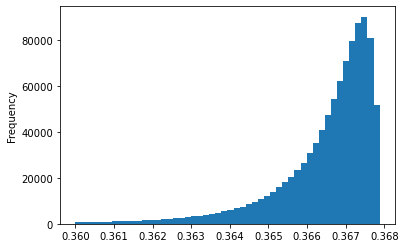

In [42]:
import matplotlib
data.loc[data.HL_bidask>0.36, 'HL_bidask'].plot.hist(bins=50)
print(len(data.loc[data.HL_bidask>0.36, 'HL_bidask'])/len(data))

In [74]:
((data.CLOSE.shift()-(data.HIGH.shift()+data.LOW.shift())/2)*\
                            (data.CLOSE.shift()-(data.HIGH+data.LOW)/2)).fillna(0)

0         0.000000e+00
1         7.312142e-05
2         7.293172e-06
3         4.952980e-06
4        -7.093804e-07
              ...     
973449   -8.552753e-06
973450   -1.800097e-05
973451    1.206331e-06
973452   -2.422716e-06
973453    5.212296e-06
Length: 973454, dtype: float32

In [43]:
data['CHL_bidask'] = np.sqrt(pd.concat([4*(data.CLOSE.shift()-(data.HIGH.shift()+data.LOW.shift())/2)*\
                            (data.CLOSE.shift()-(data.HIGH+data.LOW)/2), 
                    pd.Series(0, index=np.arange(len(data)))], axis=1).max(axis=1))
data.loc[data.TICKER != data.TICKER.shift(), 'CHL_bidask'] = 0
data.CHL_bidask.describe()

count    973454.000000
mean          0.002266
std           0.003848
min           0.000000
25%           0.000000
50%           0.000678
75%           0.003278
max           0.297831
Name: CHL_bidask, dtype: float64

0.9609647708058111


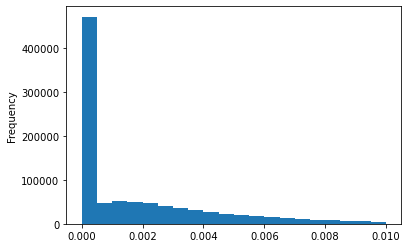

In [46]:
data.loc[(data.CHL_bidask<0.01), 'CHL_bidask'].plot.hist(bins=20)
print(len(data.loc[(data.CHL_bidask<0.01), 'CHL_bidask'])/len(data))

In [ ]:
import plotly.express as px
fig = px.area(data[['CHL_bidask', 'TICKER', 'DATE']], y='CHL_bidask', x='DATE', facet_col="TICKER", 
              facet_col_wrap=4, height=2000, facet_row_spacing=0.03,
              hover_data={"DATE": "|%B %Y"})
fig.update_yaxes(matches=None)
fig.write_html("chl_spread_rts.html")
fig.show()

In [94]:
data.columns

Index(['TICKER', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'TIMESTAMP', 'REVENUE', 'RV_EST',
       'Beta_bidask', 'Gamma_bidask', 'Alpha_bidask', 's_bidask', 'HL_bidask',
       'CHL_bidask'],
      dtype='object')

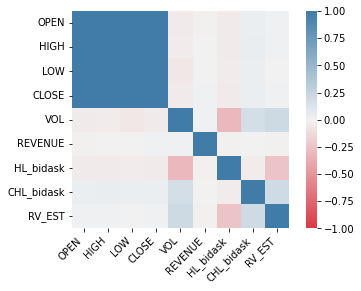

In [103]:
corr = data.loc[data.TICKER=='VTBR'][['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 
             'REVENUE', 'HL_bidask', 'CHL_bidask', 'RV_EST']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

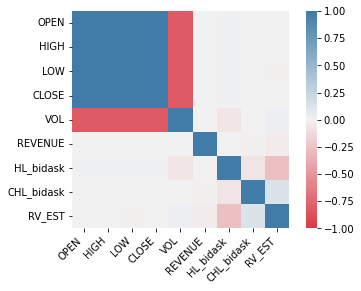

In [104]:
corr = data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 
             'REVENUE', 'HL_bidask', 'CHL_bidask', 'RV_EST']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [105]:
data.drop(['Beta_bidask', 'Gamma_bidask', 'Alpha_bidask', 's_bidask'], axis=1).to_csv('dataset_bidasks_v2.csv', index=False)

## Creating Feature Space

In [110]:
data['OPEN'] = np.log(data['OPEN'])
data['HIGH'] = np.log(data['HIGH'])
data['LOW'] = np.log(data['LOW'])
data['CLOSE'] = np.log(data['CLOSE'])
data['VOL'] = np.log(data['VOL'])
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP,REVENUE,RV_EST,hours_in_month,HL_bidask,CHL_bidask,hours_in_day
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010,2,1,11,0,2010020111,0.005647,0.000078,171,0.366863,0.000049,9
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010,2,1,12,0,2010020112,-0.005248,0.000076,171,0.366863,0.000049,9
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010,2,1,13,0,2010020113,0.006360,0.000051,171,0.366863,0.000049,9
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010,2,1,14,0,2010020114,-0.004015,0.000005,171,0.366863,0.000049,9
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010,2,1,15,0,2010020115,-0.003098,0.000011,171,0.366863,0.000049,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232600,8.216628,8.220672,11.682364,2022,2,1,20,1,2022020120,0.001671,0.000129,18,0.364473,0.000000,17
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022,2,1,21,1,2022020121,-0.002422,0.000041,18,0.364473,0.000000,17
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212894,11.437048,2022,2,1,22,1,2022020122,-0.004857,0.000082,18,0.364473,0.000000,17
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022,2,1,23,1,2022020123,-0.001302,0.000013,18,0.364473,0.000000,17


In [48]:
data = data.drop(['Beta_bidask', 'Gamma_bidask', 'Alpha_bidask'], axis=1)
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,TIMESTAMP,WEEKDAY,REVENUE,RV_EST,HL_bidask,CHL_bidask
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010.0,2.0,1.0,11,20102111,0,0.005631,0.000078,0.000000,0.000000
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010.0,2.0,1.0,12,20102112,0,-0.005261,0.000076,0.365935,0.017102
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010.0,2.0,1.0,13,20102113,0,0.006340,0.000051,0.366737,0.005401
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010.0,2.0,1.0,14,20102114,0,-0.004023,0.000005,0.366680,0.004451
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010.0,2.0,1.0,15,20102115,0,-0.003103,0.000011,0.366963,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232599,8.216628,8.220673,11.682364,2022.0,2.0,1.0,20,20222120,1,0.001670,0.000129,0.364110,0.000000
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022.0,2.0,1.0,21,20222121,1,-0.002424,0.000041,0.364297,0.000000
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212893,11.437048,2022.0,2.0,1.0,22,20222122,1,-0.004869,0.000082,0.367052,0.002197
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022.0,2.0,1.0,23,20222123,1,-0.001303,0.000013,0.366055,0.000000


In [111]:
data.columns

Index(['TICKER', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'WEEKDAY', 'TIMESTAMP', 'REVENUE', 'RV_EST',
       'hours_in_month', 'HL_bidask', 'CHL_bidask', 'hours_in_day'],
      dtype='object')

Создать следующие фичи с агрегацией часов по отрезкам (8-12, 13-17, 18-24):
* range_feature (max-min)
* mean_feature
* std_feature
* range_relation
* mean_relation
* std_relation

Фичи: 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'REVENUE', 'RV_EST', 'HL_bidask', 'CHL_bidask'

In [109]:
data['day_period'] = 0
data.loc[(data.HOUR>=13) & (data.HOUR<=17), 'day_period'] = 1
data.loc[data.HOUR>=18, 'day_period'] = 2
data.day_period.value_counts()

1    492692
2    278407
0    202355
Name: day_period, dtype: int64

In [115]:
'0'+data.MONTH.astype(int).astype(str)

0         02
1         02
2         02
3         02
4         02
          ..
973449    02
973450    02
973451    02
973452    02
973453    02
Name: MONTH, Length: 973454, dtype: object

In [185]:
data.TIMESTAMP.str.len().value_counts()

9    973454
Name: TIMESTAMP, dtype: int64

In [177]:
data.loc[:, 'MONTH'] = data.MONTH.astype(int)
data.loc[:, 'DAY'] = data.DAY.astype(int)
data.loc[data.MONTH<10, 'MONTH'] = '0'+data.MONTH.astype(str)
data.loc[data.DAY<10, 'DAY'] = '0'+data.DAY.astype(str)
data['TIMESTAMP'] = data.YEAR.astype(int).astype(str)+\
                    data.MONTH.astype(str)+\
                    data.DAY.astype(str)+\
                    data.day_period.astype(int).astype(str)
data

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,WEEKDAY,TIMESTAMP,REVENUE,RV_EST,HL_bidask,CHL_bidask,day_period
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010.0,02,01,11,0,201002010,0.005631,0.000078,0.000000,0.000000,0
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010.0,02,01,12,0,201002010,-0.005261,0.000076,0.365935,0.017102,0
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010.0,02,01,13,0,201002011,0.006340,0.000051,0.366737,0.005401,1
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010.0,02,01,14,0,201002011,-0.004023,0.000005,0.366680,0.004451,1
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010.0,02,01,15,0,201002011,-0.003103,0.000011,0.366963,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232599,8.216628,8.220673,11.682364,2022.0,02,01,20,1,202202012,0.001670,0.000129,0.364110,0.000000,2
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022.0,02,01,21,1,202202012,-0.002424,0.000041,0.364297,0.000000,2
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212893,11.437048,2022.0,02,01,22,1,202202012,-0.004869,0.000082,0.367052,0.002197,2
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022.0,02,01,23,1,202202012,-0.001303,0.000013,0.366055,0.000000,2


In [186]:
data_featured = data.groupby(['TIMESTAMP', 'TICKER'])\
    [['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL', 'REVENUE', 'RV_EST', 'HL_bidask', 'CHL_bidask']]\
                    .agg([lambda x: x.mean(),
                         lambda x: x.std(),
                         lambda x: x.max()-x.min()])

In [187]:
data_featured = data_featured.reset_index(drop=False)
data_featured

TIMESTAMP TICKER       OPEN                             HIGH  \
                         <lambda_0> <lambda_1> <lambda_2> <lambda_0>   
0       201002010   AFKS   3.291921   0.001288   0.001822   3.296223   
1       201002010   AFLT   4.026333   0.001135   0.001606   4.030780   
2       201002010   CHMF   5.855482   0.004678   0.006616   5.859859   
3       201002010   FEES  -1.084709   0.000000   0.000000  -1.080282   
4       201002010   GAZP   5.218056   0.001341   0.001896   5.224076   
...           ...    ...        ...        ...        ...        ...   
296331  202202012   TCSG   8.636531   0.003495   0.010193   8.639975   
296332  202202012  TRNFP  11.908043   0.004608   0.013788  11.909775   
296333  202202012   VKCO   6.472208   0.003830   0.010841   6.479861   
296334  202202012   VTBR  -3.153709   0.006648   0.016045  -3.151598   
296335  202202012   YNDX   8.219661   0.008846   0.026460   8.225668   

                                    LOW             ...    REVENUE     RV_EST  \
       <lambda_1> <lambda_2> <lambda_0> <lambda_1>  ... <lambda_2> <lambda_0>   
0        0.003168   0.004480   3.283050   0.003024  ...   0.010892   0.000077   
1        0.003893   0.005506   4.017283   0.001273  ...   0.006600   0.000090   
2        0.000867   0.001226   5.850807   0.002014  ...   0.008704   0.000035   
3        0.002083   0.002946  -1.090649   0.004209  ...   0.005917   0.000052   
4        0.003047   0.004309   5.212487   0.000385  ...   0.010642   0.000055   
...           ...        ...        ...        ...  ...        ...        ...   
296331   0.003447   0.008676   8.630545   0.002546  ...   0.014521   0.000043   
296332   0.003887   0.012093  11.903369   0.003170  ...   0.010771   0.000017   
296333   0.004416   0.012860   6.465429   0.003052  ...   0.026524   0.000090   
296334   0.005540   0.013564  -3.159486   0.004177  ...   0.015610   0.000027   
296335   0.007779   0.023586   8.210539   0.003330  ...   0.031682   0.000111   

                              HL_bidask                       CHL_bidask  \
       <lambda_1> <lambda_2> <lambda_0> <lambda_1> <lambda_2> <lambda_0>   
0        0.000001   0.000002   0.182968   0.258755   0.365935   0.008551   
1        0.000036   0.000051   0.183157   0.259023   0.366313   0.000000   
2        0.000019   0.000027   0.183538   0.259561   0.367075   0.002655   
3        0.000022   0.000032   0.182976   0.258767   0.365952   0.000000   
4        0.000020   0.000028   0.183457   0.259447   0.366913   0.000371   
...           ...        ...        ...        ...        ...        ...   
296331   0.000031   0.000068   0.366746   0.000785   0.002096   0.002586   
296332   0.000015   0.000034   0.366729   0.000731   0.002119   0.001609   
296333   0.000059   0.000150   0.366428   0.001139   0.003507   0.005549   
296334   0.000023   0.000064   0.366730   0.000927   0.002599   0.002393   
296335   0.000103   0.000281   0.364988   0.001542   0.004613   0.001515   

                              
       <lambda_1> <lambda_2>  
0        0.012093   0.017102  
1        0.000000   0.000000  
2        0.003755   0.005310  
3        0.000000   0.000000  
4        0.000525   0.000742  
...           ...        ...  
296331   0.003964   0.010524  
296332   0.002031   0.004277  
296333   0.003236   0.010525  
296334   0.002496   0.005957  
296335   0.002015   0.004566  

[296336 rows x 29 columns]

In [188]:
data_featured.columns = ['TIMESTAMP', 'TICKER']+['_'.join(col).strip() for col in data_featured.columns.drop(['TIMESTAMP',
                                                             'TICKER']).values]
data_featured

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,TIMESTAMP,TICKER,OPEN_<lambda_0>,OPEN_<lambda_1>,OPEN_<lambda_2>,HIGH_<lambda_0>,HIGH_<lambda_1>,HIGH_<lambda_2>,LOW_<lambda_0>,LOW_<lambda_1>,...,REVENUE_<lambda_2>,RV_EST_<lambda_0>,RV_EST_<lambda_1>,RV_EST_<lambda_2>,HL_bidask_<lambda_0>,HL_bidask_<lambda_1>,HL_bidask_<lambda_2>,CHL_bidask_<lambda_0>,CHL_bidask_<lambda_1>,CHL_bidask_<lambda_2>
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,0.010892,0.000077,0.000001,0.000002,0.182968,0.258755,0.365935,0.008551,0.012093,0.017102
1,201002010,AFLT,4.026333,0.001135,0.001606,4.030780,0.003893,0.005506,4.017283,0.001273,...,0.006600,0.000090,0.000036,0.000051,0.183157,0.259023,0.366313,0.000000,0.000000,0.000000
2,201002010,CHMF,5.855482,0.004678,0.006616,5.859859,0.000867,0.001226,5.850807,0.002014,...,0.008704,0.000035,0.000019,0.000027,0.183538,0.259561,0.367075,0.002655,0.003755,0.005310
3,201002010,FEES,-1.084709,0.000000,0.000000,-1.080282,0.002083,0.002946,-1.090649,0.004209,...,0.005917,0.000052,0.000022,0.000032,0.182976,0.258767,0.365952,0.000000,0.000000,0.000000
4,201002010,GAZP,5.218056,0.001341,0.001896,5.224076,0.003047,0.004309,5.212487,0.000385,...,0.010642,0.000055,0.000020,0.000028,0.183457,0.259447,0.366913,0.000371,0.000525,0.000742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202202012,TCSG,8.636531,0.003495,0.010193,8.639975,0.003447,0.008676,8.630545,0.002546,...,0.014521,0.000043,0.000031,0.000068,0.366746,0.000785,0.002096,0.002586,0.003964,0.010524
296332,202202012,TRNFP,11.908043,0.004608,0.013788,11.909775,0.003887,0.012093,11.903369,0.003170,...,0.010771,0.000017,0.000015,0.000034,0.366729,0.000731,0.002119,0.001609,0.002031,0.004277
296333,202202012,VKCO,6.472208,0.003830,0.010841,6.479861,0.004416,0.012860,6.465429,0.003052,...,0.026524,0.000090,0.000059,0.000150,0.366428,0.001139,0.003507,0.005549,0.003236,0.010525
296334,202202012,VTBR,-3.153709,0.006648,0.016045,-3.151598,0.005540,0.013564,-3.159486,0.004177,...,0.015610,0.000027,0.000023,0.000064,0.366730,0.000927,0.002599,0.002393,0.002496,0.005957


In [189]:
data_featured.columns = data_featured.columns.str.replace('<lambda_0>', 'MEAN')
data_featured.columns = data_featured.columns.str.replace('<lambda_1>', 'STD')
data_featured.columns = data_featured.columns.str.replace('<lambda_2>', 'RANGE')
data_featured

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE,RV_EST_MEAN,RV_EST_STD,RV_EST_RANGE,HL_bidask_MEAN,HL_bidask_STD,HL_bidask_RANGE,CHL_bidask_MEAN,CHL_bidask_STD,CHL_bidask_RANGE
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,0.010892,0.000077,0.000001,0.000002,0.182968,0.258755,0.365935,0.008551,0.012093,0.017102
1,201002010,AFLT,4.026333,0.001135,0.001606,4.030780,0.003893,0.005506,4.017283,0.001273,...,0.006600,0.000090,0.000036,0.000051,0.183157,0.259023,0.366313,0.000000,0.000000,0.000000
2,201002010,CHMF,5.855482,0.004678,0.006616,5.859859,0.000867,0.001226,5.850807,0.002014,...,0.008704,0.000035,0.000019,0.000027,0.183538,0.259561,0.367075,0.002655,0.003755,0.005310
3,201002010,FEES,-1.084709,0.000000,0.000000,-1.080282,0.002083,0.002946,-1.090649,0.004209,...,0.005917,0.000052,0.000022,0.000032,0.182976,0.258767,0.365952,0.000000,0.000000,0.000000
4,201002010,GAZP,5.218056,0.001341,0.001896,5.224076,0.003047,0.004309,5.212487,0.000385,...,0.010642,0.000055,0.000020,0.000028,0.183457,0.259447,0.366913,0.000371,0.000525,0.000742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202202012,TCSG,8.636531,0.003495,0.010193,8.639975,0.003447,0.008676,8.630545,0.002546,...,0.014521,0.000043,0.000031,0.000068,0.366746,0.000785,0.002096,0.002586,0.003964,0.010524
296332,202202012,TRNFP,11.908043,0.004608,0.013788,11.909775,0.003887,0.012093,11.903369,0.003170,...,0.010771,0.000017,0.000015,0.000034,0.366729,0.000731,0.002119,0.001609,0.002031,0.004277
296333,202202012,VKCO,6.472208,0.003830,0.010841,6.479861,0.004416,0.012860,6.465429,0.003052,...,0.026524,0.000090,0.000059,0.000150,0.366428,0.001139,0.003507,0.005549,0.003236,0.010525
296334,202202012,VTBR,-3.153709,0.006648,0.016045,-3.151598,0.005540,0.013564,-3.159486,0.004177,...,0.015610,0.000027,0.000023,0.000064,0.366730,0.000927,0.002599,0.002393,0.002496,0.005957


In [147]:
data_featured.loc[data_featured.TICKER=='VTBR'].iloc[:, 3::3]

,OPEN_STD,HIGH_STD,LOW_STD,CLOSE_STD,VOL_STD,REVENUE_STD,RV_EST_STD,HL_bidask_STD,CHL_bidask_STD
25,0.006622,0.001873,0.003797,0.000000,0.117551,0.006622,9.505267e-07,0.258893,0.000000
51,0.004392,0.004523,0.004306,0.004373,0.408439,0.003074,2.145994e-05,0.000369,0.001319
77,0.002842,0.003766,0.001898,0.000945,0.510105,0.001897,1.934325e-05,0.000604,0.000000
103,0.002815,0.002815,0.000943,0.000000,0.103319,0.002815,2.613899e-06,0.000437,0.002473
129,0.001454,0.001775,0.002917,0.002885,0.480969,0.003120,1.511296e-05,0.000600,0.001059
...,...,...,...,...,...,...,...,...,...
296162,0.007235,0.007207,0.007674,0.005806,0.353976,0.003363,1.986050e-05,0.000987,0.001096
296205,0.003691,0.003275,0.003783,0.004807,0.597922,0.002643,9.815935e-06,0.000331,0.002456
296248,0.007280,0.005997,0.009049,0.008402,0.596080,0.005246,7.759455e-05,0.000847,0.005055
296291,0.004026,0.002061,0.003308,0.004044,0.510862,0.006866,1.585190e-05,0.001191,0.004209


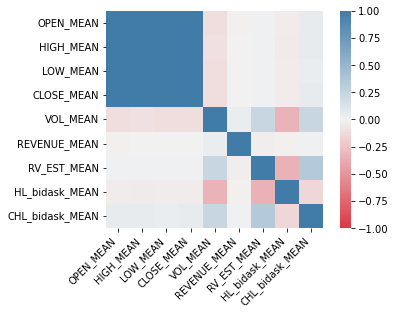

In [146]:
corr = data_featured.loc[data_featured.TICKER=='VTBR'].iloc[:, 2::3].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'OPEN_STD'),
 Text(1.5, 0, 'HIGH_STD'),
 Text(2.5, 0, 'LOW_STD'),
 Text(3.5, 0, 'CLOSE_STD'),
 Text(4.5, 0, 'VOL_STD'),
 Text(5.5, 0, 'REVENUE_STD'),
 Text(6.5, 0, 'RV_EST_STD'),
 Text(7.5, 0, 'HL_bidask_STD'),
 Text(8.5, 0, 'CHL_bidask_STD')]

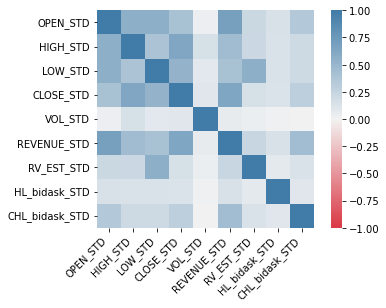

In [148]:
corr = data_featured.loc[data_featured.TICKER=='VTBR'].iloc[:, 3::3].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [149]:
data_featured.loc[data_featured.TICKER=='VTBR'].iloc[:, 2::3].corr()

,OPEN_MEAN,HIGH_MEAN,LOW_MEAN,CLOSE_MEAN,VOL_MEAN,REVENUE_MEAN,RV_EST_MEAN,HL_bidask_MEAN,CHL_bidask_MEAN
OPEN_MEAN,1.000000,0.999926,0.999919,0.999913,-0.105664,-0.007842,0.015758,-0.036118,0.048551
HIGH_MEAN,0.999926,1.000000,0.999829,0.999937,-0.099857,-0.000405,0.020032,-0.040480,0.052878
LOW_MEAN,0.999919,0.999829,1.000000,0.999926,-0.110929,-0.000677,0.007844,-0.031504,0.043714
CLOSE_MEAN,0.999913,0.999937,0.999926,1.000000,-0.105066,0.005381,0.015403,-0.036291,0.048662
VOL_MEAN,-0.105664,-0.099857,-0.110929,-0.105066,1.000000,0.045340,0.238996,-0.333831,0.229356
REVENUE_MEAN,-0.007842,-0.000405,-0.000677,0.005381,0.045340,1.000000,-0.026822,-0.012997,0.008363
RV_EST_MEAN,0.015758,0.020032,0.007844,0.015403,0.238996,-0.026822,1.000000,-0.336790,0.341222
HL_bidask_MEAN,-0.036118,-0.040480,-0.031504,-0.036291,-0.333831,-0.012997,-0.336790,1.000000,-0.150995
CHL_bidask_MEAN,0.048551,0.052878,0.043714,0.048662,0.229356,0.008363,0.341222,-0.150995,1.000000


## Add relations

In [199]:
data_featured = data_featured.sort_values(['TICKER', 'TIMESTAMP']).reset_index(drop=True)

In [195]:
cols = ['OPEN_MEAN', 'OPEN_STD', 'OPEN_RANGE',
       'HIGH_MEAN', 'HIGH_STD', 'HIGH_RANGE', 'LOW_MEAN', 'LOW_STD',
       'LOW_RANGE', 'CLOSE_MEAN', 'CLOSE_STD', 'CLOSE_RANGE', 'VOL_MEAN',
       'VOL_STD', 'VOL_RANGE', 'REVENUE_MEAN', 'REVENUE_STD', 'REVENUE_RANGE',
       'RV_EST_MEAN', 'RV_EST_STD', 'RV_EST_RANGE', 'HL_bidask_MEAN',
       'HL_bidask_STD', 'HL_bidask_RANGE', 'CHL_bidask_MEAN', 'CHL_bidask_STD',
       'CHL_bidask_RANGE']

cols_rel = [str(x)+'_REL' for x in cols]

In [200]:
data_featured[cols[0]]/data_featured[cols[0]].shift()

0              NaN
1         0.998737
2         1.000203
3         1.003424
4         0.995890
            ...   
296331    1.000888
296332    1.003276
296333    1.005455
296334    0.998540
296335    0.998492
Name: OPEN_MEAN, Length: 296336, dtype: float64

In [201]:
data_featured

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE,RV_EST_MEAN,RV_EST_STD,RV_EST_RANGE,HL_bidask_MEAN,HL_bidask_STD,HL_bidask_RANGE,CHL_bidask_MEAN,CHL_bidask_STD,CHL_bidask_RANGE
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,0.010892,0.000077,0.000001,0.000002,0.182968,0.258755,0.365935,0.008551,0.012093,0.017102
1,201002011,AFKS,3.287764,0.002758,0.007089,3.291341,0.003375,0.009303,3.285838,0.001695,...,0.010363,0.000015,0.000020,0.000050,0.366705,0.000448,0.001184,0.002810,0.002174,0.005401
2,201002012,AFKS,3.288433,0.005171,0.007313,3.294539,0.001626,0.002299,3.284739,0.000053,...,0.018114,0.000016,0.000002,0.000002,0.367214,0.000240,0.000339,0.005855,0.005277,0.007462
3,201002020,AFKS,3.299691,0.006026,0.008523,3.302639,0.010144,0.014346,3.291248,0.004025,...,0.007483,0.000056,0.000046,0.000065,0.363267,0.000730,0.001033,0.000000,0.000000,0.000000
4,201002021,AFKS,3.286128,0.004936,0.012961,3.290254,0.003340,0.008224,3.279419,0.002435,...,0.016587,0.000051,0.000032,0.000082,0.366258,0.000259,0.000631,0.006334,0.002663,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202201311,YNDX,8.172613,0.002972,0.007340,8.176751,0.001387,0.003709,8.169855,0.001827,...,0.007109,0.000022,0.000009,0.000023,0.366817,0.000552,0.001344,0.002573,0.002212,0.004590
296332,202201312,YNDX,8.199389,0.017507,0.040926,8.207265,0.013950,0.042917,8.193740,0.017728,...,0.030479,0.000070,0.000046,0.000132,0.364750,0.002771,0.006440,0.000829,0.002195,0.005806
296333,202202010,YNDX,8.244115,0.015259,0.036266,8.261812,0.011753,0.032147,8.233130,0.011612,...,0.048307,0.000467,0.000590,0.001414,0.362179,0.004263,0.010641,0.003802,0.005223,0.010109
296334,202202011,YNDX,8.232077,0.005600,0.014764,8.238115,0.004888,0.009563,8.226612,0.003028,...,0.021508,0.000056,0.000038,0.000098,0.366047,0.001244,0.002996,0.003455,0.003721,0.008907


In [202]:
data_featured.loc[data_featured.TICKER==data_featured.TICKER.shift()] 

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE,RV_EST_MEAN,RV_EST_STD,RV_EST_RANGE,HL_bidask_MEAN,HL_bidask_STD,HL_bidask_RANGE,CHL_bidask_MEAN,CHL_bidask_STD,CHL_bidask_RANGE
1,201002011,AFKS,3.287764,0.002758,0.007089,3.291341,0.003375,0.009303,3.285838,0.001695,...,0.010363,0.000015,0.000020,0.000050,0.366705,0.000448,0.001184,0.002810,0.002174,0.005401
2,201002012,AFKS,3.288433,0.005171,0.007313,3.294539,0.001626,0.002299,3.284739,0.000053,...,0.018114,0.000016,0.000002,0.000002,0.367214,0.000240,0.000339,0.005855,0.005277,0.007462
3,201002020,AFKS,3.299691,0.006026,0.008523,3.302639,0.010144,0.014346,3.291248,0.004025,...,0.007483,0.000056,0.000046,0.000065,0.363267,0.000730,0.001033,0.000000,0.000000,0.000000
4,201002021,AFKS,3.286128,0.004936,0.012961,3.290254,0.003340,0.008224,3.279419,0.002435,...,0.016587,0.000051,0.000032,0.000082,0.366258,0.000259,0.000631,0.006334,0.002663,0.007400
5,201002022,AFKS,3.283858,0.001087,0.001537,3.290517,0.006003,0.008489,3.282844,0.002520,...,0.002734,0.000032,0.000029,0.000042,0.366264,0.001258,0.001779,0.005002,0.007075,0.010005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202201311,YNDX,8.172613,0.002972,0.007340,8.176751,0.001387,0.003709,8.169855,0.001827,...,0.007109,0.000022,0.000009,0.000023,0.366817,0.000552,0.001344,0.002573,0.002212,0.004590
296332,202201312,YNDX,8.199389,0.017507,0.040926,8.207265,0.013950,0.042917,8.193740,0.017728,...,0.030479,0.000070,0.000046,0.000132,0.364750,0.002771,0.006440,0.000829,0.002195,0.005806
296333,202202010,YNDX,8.244115,0.015259,0.036266,8.261812,0.011753,0.032147,8.233130,0.011612,...,0.048307,0.000467,0.000590,0.001414,0.362179,0.004263,0.010641,0.003802,0.005223,0.010109
296334,202202011,YNDX,8.232077,0.005600,0.014764,8.238115,0.004888,0.009563,8.226612,0.003028,...,0.021508,0.000056,0.000038,0.000098,0.366047,0.001244,0.002996,0.003455,0.003721,0.008907


In [203]:
for i in range(len(cols)):
    data_featured[cols_rel[i]] = 1
    data_featured.loc[data_featured.TICKER==data_featured.TICKER.shift(), cols_rel[i]] = data_featured[cols[i]]/data_featured[cols[i]].shift()
data_featured

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE_REL,RV_EST_MEAN_REL,RV_EST_STD_REL,RV_EST_RANGE_REL,HL_bidask_MEAN_REL,HL_bidask_STD_REL,HL_bidask_RANGE_REL,CHL_bidask_MEAN_REL,CHL_bidask_STD_REL,CHL_bidask_RANGE_REL
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,201002011,AFKS,3.287764,0.002758,0.007089,3.291341,0.003375,0.009303,3.285838,0.001695,...,0.951471,0.200167,13.636817,23.544678,2.004208,0.001732,0.003235,0.328580,0.179811,0.315817
2,201002012,AFKS,3.288433,0.005171,0.007313,3.294539,0.001626,0.002299,3.284739,0.000053,...,1.747924,1.013671,0.081391,0.047141,1.001388,0.535487,0.286804,2.083942,2.426595,1.381582
3,201002020,AFKS,3.299691,0.006026,0.008523,3.302639,0.010144,0.014346,3.291248,0.004025,...,0.413112,3.560057,27.885260,27.885260,0.989249,3.041524,3.041524,0.000000,0.000000,0.000000
4,201002021,AFKS,3.286128,0.004936,0.012961,3.290254,0.003340,0.008224,3.279419,0.002435,...,2.216555,0.908462,0.692016,1.251708,1.008235,0.354757,0.611441,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202201311,YNDX,8.172613,0.002972,0.007340,8.176751,0.001387,0.003709,8.169855,0.001827,...,0.446882,0.329306,0.169856,0.183720,1.005101,0.293492,0.284031,1.374393,0.528307,0.490376
296332,202201312,YNDX,8.199389,0.017507,0.040926,8.207265,0.013950,0.042917,8.193740,0.017728,...,4.287631,3.135008,5.101327,5.659064,0.994364,5.019437,4.790454,0.322375,0.992315,1.264942
296333,202202010,YNDX,8.244115,0.015259,0.036266,8.261812,0.011753,0.032147,8.233130,0.011612,...,1.584919,6.661506,12.708766,10.739651,0.992951,1.538345,1.652407,4.583152,2.380003,1.741036
296334,202202011,YNDX,8.232077,0.005600,0.014764,8.238115,0.004888,0.009563,8.226612,0.003028,...,0.445236,0.119041,0.064768,0.069167,1.010680,0.291800,0.281568,0.908841,0.712434,0.881151


In [218]:
zero_fill = list(data_featured.columns[data_featured.columns.str.endswith('RANGE')])+\
list(data_featured.columns[data_featured.columns.str.endswith('STD')])+\
list(data_featured.columns[data_featured.columns.str.endswith('MEAN')])
for col in zero_fill:
    data_featured.loc[:, col].fillna(0, inplace=True)
data_featured.fillna(1, inplace=True)
data_featured

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE_REL,RV_EST_MEAN_REL,RV_EST_STD_REL,RV_EST_RANGE_REL,HL_bidask_MEAN_REL,HL_bidask_STD_REL,HL_bidask_RANGE_REL,CHL_bidask_MEAN_REL,CHL_bidask_STD_REL,CHL_bidask_RANGE_REL
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,201002011,AFKS,3.287764,0.002758,0.007089,3.291341,0.003375,0.009303,3.285838,0.001695,...,0.951471,0.200167,13.636817,23.544678,2.004208,0.001732,0.003235,0.328580,0.179811,0.315817
2,201002012,AFKS,3.288433,0.005171,0.007313,3.294539,0.001626,0.002299,3.284739,0.000053,...,1.747924,1.013671,0.081391,0.047141,1.001388,0.535487,0.286804,2.083942,2.426595,1.381582
3,201002020,AFKS,3.299691,0.006026,0.008523,3.302639,0.010144,0.014346,3.291248,0.004025,...,0.413112,3.560057,27.885260,27.885260,0.989249,3.041524,3.041524,0.000000,0.000000,0.000000
4,201002021,AFKS,3.286128,0.004936,0.012961,3.290254,0.003340,0.008224,3.279419,0.002435,...,2.216555,0.908462,0.692016,1.251708,1.008235,0.354757,0.611441,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202201311,YNDX,8.172613,0.002972,0.007340,8.176751,0.001387,0.003709,8.169855,0.001827,...,0.446882,0.329306,0.169856,0.183720,1.005101,0.293492,0.284031,1.374393,0.528307,0.490376
296332,202201312,YNDX,8.199389,0.017507,0.040926,8.207265,0.013950,0.042917,8.193740,0.017728,...,4.287631,3.135008,5.101327,5.659064,0.994364,5.019437,4.790454,0.322375,0.992315,1.264942
296333,202202010,YNDX,8.244115,0.015259,0.036266,8.261812,0.011753,0.032147,8.233130,0.011612,...,1.584919,6.661506,12.708766,10.739651,0.992951,1.538345,1.652407,4.583152,2.380003,1.741036
296334,202202011,YNDX,8.232077,0.005600,0.014764,8.238115,0.004888,0.009563,8.226612,0.003028,...,0.445236,0.119041,0.064768,0.069167,1.010680,0.291800,0.281568,0.908841,0.712434,0.881151


In [220]:
data_featured.replace(np.inf, 10, inplace=True)
data_featured.replace(-np.inf, -10, inplace=True)
data_featured

,TIMESTAMP,TICKER,OPEN_MEAN,OPEN_STD,OPEN_RANGE,HIGH_MEAN,HIGH_STD,HIGH_RANGE,LOW_MEAN,LOW_STD,...,REVENUE_RANGE_REL,RV_EST_MEAN_REL,RV_EST_STD_REL,RV_EST_RANGE_REL,HL_bidask_MEAN_REL,HL_bidask_STD_REL,HL_bidask_RANGE_REL,CHL_bidask_MEAN_REL,CHL_bidask_STD_REL,CHL_bidask_RANGE_REL
0,201002010,AFKS,3.291921,0.001288,0.001822,3.296223,0.003168,0.004480,3.283050,0.003024,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,201002011,AFKS,3.287764,0.002758,0.007089,3.291341,0.003375,0.009303,3.285838,0.001695,...,0.951471,0.200167,13.636817,23.544678,2.004208,0.001732,0.003235,0.328580,0.179811,0.315817
2,201002012,AFKS,3.288433,0.005171,0.007313,3.294539,0.001626,0.002299,3.284739,0.000053,...,1.747924,1.013671,0.081391,0.047141,1.001388,0.535487,0.286804,2.083942,2.426595,1.381582
3,201002020,AFKS,3.299691,0.006026,0.008523,3.302639,0.010144,0.014346,3.291248,0.004025,...,0.413112,3.560057,27.885260,27.885260,0.989249,3.041524,3.041524,0.000000,0.000000,0.000000
4,201002021,AFKS,3.286128,0.004936,0.012961,3.290254,0.003340,0.008224,3.279419,0.002435,...,2.216555,0.908462,0.692016,1.251708,1.008235,0.354757,0.611441,10.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296331,202201311,YNDX,8.172613,0.002972,0.007340,8.176751,0.001387,0.003709,8.169855,0.001827,...,0.446882,0.329306,0.169856,0.183720,1.005101,0.293492,0.284031,1.374393,0.528307,0.490376
296332,202201312,YNDX,8.199389,0.017507,0.040926,8.207265,0.013950,0.042917,8.193740,0.017728,...,4.287631,3.135008,5.101327,5.659064,0.994364,5.019437,4.790454,0.322375,0.992315,1.264942
296333,202202010,YNDX,8.244115,0.015259,0.036266,8.261812,0.011753,0.032147,8.233130,0.011612,...,1.584919,6.661506,12.708766,10.739651,0.992951,1.538345,1.652407,4.583152,2.380003,1.741036
296334,202202011,YNDX,8.232077,0.005600,0.014764,8.238115,0.004888,0.009563,8.226612,0.003028,...,0.445236,0.119041,0.064768,0.069167,1.010680,0.291800,0.281568,0.908841,0.712434,0.881151


0.9906187570865504


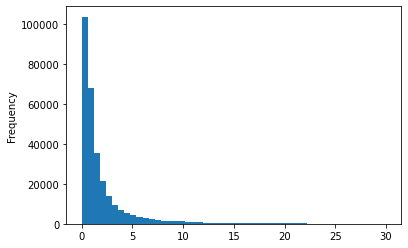

In [248]:
data_featured.loc[data_featured.RV_EST_MEAN_REL<30, 'RV_EST_MEAN_REL'].plot.hist(bins=50)
print(len(data_featured.loc[(data_featured.RV_EST_MEAN_REL<30), 'RV_EST_MEAN_REL'])/len(data_featured))

0.9792870255385778


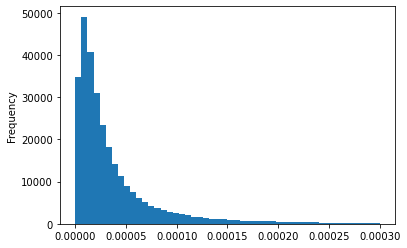

In [247]:
data_featured.loc[data_featured.RV_EST_MEAN<0.0003, 'RV_EST_MEAN'].plot.hist(bins=50)
print(len(data_featured.loc[(data_featured.RV_EST_MEAN<0.0003), 'RV_EST_MEAN'])/len(data_featured))

0.9183351242072044


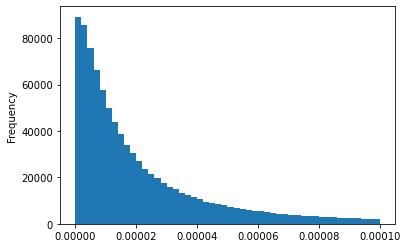

In [230]:
data.loc[(data.RV_EST<0.0001), 'RV_EST'].plot.hist(bins=50)
print(len(data.loc[(data.RV_EST<0.0001), 'RV_EST'])/len(data))

In [250]:
data_featured.columns.drop(['TIMESTAMP', 'TICKER'])

Index(['OPEN_MEAN', 'OPEN_STD', 'OPEN_RANGE', 'HIGH_MEAN', 'HIGH_STD',
       'HIGH_RANGE', 'LOW_MEAN', 'LOW_STD', 'LOW_RANGE', 'CLOSE_MEAN',
       'CLOSE_STD', 'CLOSE_RANGE', 'VOL_MEAN', 'VOL_STD', 'VOL_RANGE',
       'REVENUE_MEAN', 'REVENUE_STD', 'REVENUE_RANGE', 'RV_EST_MEAN',
       'RV_EST_STD', 'RV_EST_RANGE', 'HL_bidask_MEAN', 'HL_bidask_STD',
       'HL_bidask_RANGE', 'CHL_bidask_MEAN', 'CHL_bidask_STD',
       'CHL_bidask_RANGE', 'OPEN_MEAN_REL', 'OPEN_STD_REL', 'OPEN_RANGE_REL',
       'HIGH_MEAN_REL', 'HIGH_STD_REL', 'HIGH_RANGE_REL', 'LOW_MEAN_REL',
       'LOW_STD_REL', 'LOW_RANGE_REL', 'CLOSE_MEAN_REL', 'CLOSE_STD_REL',
       'CLOSE_RANGE_REL', 'VOL_MEAN_REL', 'VOL_STD_REL', 'VOL_RANGE_REL',
       'REVENUE_MEAN_REL', 'REVENUE_STD_REL', 'REVENUE_RANGE_REL',
       'RV_EST_MEAN_REL', 'RV_EST_STD_REL', 'RV_EST_RANGE_REL',
       'HL_bidask_MEAN_REL', 'HL_bidask_STD_REL', 'HL_bidask_RANGE_REL',
       'CHL_bidask_MEAN_REL', 'CHL_bidask_STD_REL', 'CHL_bidask_RANGE_REL'],
 

In [251]:
wide_df = data_featured.pivot(index='TIMESTAMP', columns='TICKER', values=data_featured.columns.drop(['TIMESTAMP', 'TICKER']))
wide_df

OPEN_MEAN                                                    \
TICKER         AFKS      AFLT      ALRS      CBOM      CHMF      DSKY   
TIMESTAMP                                                               
201002010  3.291921  4.026333       NaN       NaN  5.855482       NaN   
201002011  3.287764  4.025232       NaN       NaN  5.849040       NaN   
201002012  3.288433  4.024974       NaN       NaN  5.835979       NaN   
201002020  3.299691  4.043110       NaN       NaN  5.857618       NaN   
201002021  3.286128  4.037805       NaN       NaN  5.856975       NaN   
...             ...       ...       ...       ...       ...       ...   
202201311  3.008440  4.041006  4.750926  1.991404  7.318139  4.636899   
202201312  3.006611  4.047500  4.734157  1.974179  7.318859  4.631021   
202202010  3.029302  4.050179  4.742293  1.976327  7.318484  4.636783   
202202011  3.027985  4.038401  4.744092  1.969653  7.330973  4.639874   
202202012  3.021028  4.043749  4.741368  1.965410  7.332665  4.639460   

                                                   ... CHL_bidask_RANGE_REL  \
TICKER         ENPG      FEES      FIVE      FIXP  ...                SBERP   
TIMESTAMP                                          ...                        
201002010       NaN -1.084709       NaN       NaN  ...             1.000000   
201002011       NaN -1.079993       NaN       NaN  ...             0.874487   
201002012       NaN -1.081755       NaN       NaN  ...             0.000000   
201002020       NaN -1.071485       NaN       NaN  ...            10.000000   
201002021       NaN -1.073530       NaN       NaN  ...             0.313841   
...             ...       ...       ...       ...  ...                  ...   
202201311  6.807913 -1.933283  7.472273  6.065309  ...             0.000000   
202201312  6.802628 -1.939717  7.465932  6.083963  ...            10.000000   
202202010  6.804057 -1.933923  7.471979  6.088125  ...             2.597884   
202202011  6.793344 -1.937317  7.461408  6.098789  ...             0.426723   
202202012  6.784614 -1.941740  7.454923  6.101104  ...             0.267513   

                                                                           \
TICKER          SNGS      SNGSP       TATN     TATNP      TCSG      TRNFP   
TIMESTAMP                                                                   
201002010   1.000000   1.000000   1.000000  1.000000       NaN   1.000000   
201002011  10.000000  10.000000  10.000000  0.667587       NaN  10.000000   
201002012   0.741981   0.690567   0.294739  1.384172       NaN   0.000000   
201002020   1.177103   0.000000   2.803938  2.396778       NaN   1.000000   
201002021   0.829648  10.000000   0.253907  0.829299       NaN  10.000000   
...              ...        ...        ...       ...       ...        ...   
202201311   0.604990   0.147553   0.673738  1.594033  0.514789   0.310298   
202201312   1.377343   3.905862   0.596751  0.723787  0.898569   1.505481   
202202010   0.960409   1.083212   0.738585  1.087226  0.247009   2.340952   
202202011   1.175008   1.368822   2.484119  0.895587  3.075257   0.223052   
202202012   0.995590   0.448757   1.343856  1.063995  1.592950   1.831978   

                                          
TICKER         VKCO       VTBR      YNDX  
TIMESTAMP                                 
201002010       NaN   1.000000       NaN  
201002011       NaN  10.000000       NaN  
201002012       NaN   0.000000       NaN  
201002020       NaN  10.000000       NaN  
201002021       NaN   0.662994       NaN  
...             ...        ...       ...  
202201311  1.028962   0.280044  0.490376  
202201312  0.684897   2.712245  1.264942  
202202010  1.546872   1.595468  1.741036  
202202011  0.652557   0.819443  0.881151  
202202012  1.090443   0.758272  0.512615  

[9066 rows x 2322 columns]

In [252]:
wide_df.columns = wide_df.columns.swaplevel(0, 1)
wide_df.sort_index(axis=1, level=0, inplace=True)
wide_df

TICKER               AFKS                                       \
          CHL_bidask_MEAN CHL_bidask_MEAN_REL CHL_bidask_RANGE   
TIMESTAMP                                                        
201002010        0.008551            1.000000         0.017102   
201002011        0.002810            0.328580         0.005401   
201002012        0.005855            2.083942         0.007462   
201002020        0.000000            0.000000         0.000000   
201002021        0.006334           10.000000         0.007400   
...                   ...                 ...              ...   
202201311        0.004353            0.899785         0.011940   
202201312        0.001531            0.351678         0.010716   
202202010        0.008578            5.603182         0.006628   
202202011        0.001511            0.176206         0.002873   
202202012        0.000302            0.199505         0.002111   

TICKER                                                                       \
          CHL_bidask_RANGE_REL CHL_bidask_STD CHL_bidask_STD_REL CLOSE_MEAN   
TIMESTAMP                                                                     
201002010             1.000000       0.012093           1.000000   3.292106   
201002011             0.315817       0.002174           0.179811   3.287779   
201002012             1.381582       0.005277           2.426595   3.290214   
201002020             0.000000       0.000000           0.000000   3.293575   
201002021            10.000000       0.002663          10.000000   3.283051   
...                        ...            ...                ...        ...   
202201311             0.823218       0.004943           0.811475   3.002858   
202201312             0.897494       0.004050           0.819378   3.010817   
202202010             0.618488       0.002920           0.720856   3.028778   
202202011             0.433480       0.001438           0.492436   3.029059   
202202012             0.734694       0.000798           0.554893   3.020477   

TICKER                                                ...         YNDX  \
          CLOSE_MEAN_REL CLOSE_RANGE CLOSE_RANGE_REL  ... RV_EST_RANGE   
TIMESTAMP                                             ...                
201002010       1.000000    0.012714        1.000000  ...          NaN   
201002011       0.998686    0.007164        0.563440  ...          NaN   
201002012       1.000741    0.010801        1.507788  ...          NaN   
201002020       1.001021    0.001039        0.096219  ...          NaN   
201002021       0.996805    0.010202        9.816930  ...          NaN   
...                  ...         ...             ...  ...          ...   
202201311       0.995223    0.027429        1.855295  ...     0.000023   
202201312       1.002651    0.027495        1.002416  ...     0.000132   
202202010       1.005966    0.012724        0.462761  ...     0.001414   
202202011       1.000093    0.004353        0.342122  ...     0.000098   
202202012       0.997167    0.012259        2.816135  ...     0.000281   

TICKER                                                                        \
          RV_EST_RANGE_REL RV_EST_STD RV_EST_STD_REL   VOL_MEAN VOL_MEAN_REL   
TIMESTAMP                                                                      
201002010              NaN        NaN            NaN        NaN          NaN   
201002011              NaN        NaN            NaN        NaN          NaN   
201002012              NaN        NaN            NaN        NaN          NaN   
201002020              NaN        NaN            NaN        NaN          NaN   
201002021              NaN        NaN            NaN        NaN          NaN   
...                    ...        ...            ...        ...          ...   
202201311         0.183720   0.000009       0.169856  11.550805     0.995403   
202201312         5.659064   0.000046       5.101327  12.075398     1.045416   
202202010        10.739651   0.000590      12.70876

In [253]:
wide_df.columns =  ['_'.join(col).strip() for col in wide_df.columns.values]
wide_df

,AFKS_CHL_bidask_MEAN,AFKS_CHL_bidask_MEAN_REL,AFKS_CHL_bidask_RANGE,AFKS_CHL_bidask_RANGE_REL,AFKS_CHL_bidask_STD,AFKS_CHL_bidask_STD_REL,AFKS_CLOSE_MEAN,AFKS_CLOSE_MEAN_REL,AFKS_CLOSE_RANGE,AFKS_CLOSE_RANGE_REL,...,YNDX_RV_EST_RANGE,YNDX_RV_EST_RANGE_REL,YNDX_RV_EST_STD,YNDX_RV_EST_STD_REL,YNDX_VOL_MEAN,YNDX_VOL_MEAN_REL,YNDX_VOL_RANGE,YNDX_VOL_RANGE_REL,YNDX_VOL_STD,YNDX_VOL_STD_REL
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
201002010,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201002011,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,0.563440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201002012,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201002020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,0.096219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201002021,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,9.816930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202201311,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,1.855295,...,0.000023,0.183720,0.000009,0.169856,11.550805,0.995403,0.538369,0.350883,0.232637,0.365863
202201312,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,1.002416,...,0.000132,5.659064,0.000046,5.101327,12.075398,1.045416,1.597880,2.967999,0.639157,2.747444
202202010,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,0.462761,...,0.001414,10.739651,0.000590,12.708766,12.561023,1.040216,1.139748,0.713288,0.425679,0.666000


In [254]:
wide_df = wide_df.reset_index()

In [261]:
targets = wide_df[wide_df.columns[wide_df.columns.str.endswith('_RV_EST_MEAN')]].shift(-1)
targets

,AFKS_RV_EST_MEAN,AFLT_RV_EST_MEAN,ALRS_RV_EST_MEAN,CBOM_RV_EST_MEAN,CHMF_RV_EST_MEAN,DSKY_RV_EST_MEAN,ENPG_RV_EST_MEAN,FEES_RV_EST_MEAN,FIVE_RV_EST_MEAN,FIXP_RV_EST_MEAN,...,SBERP_RV_EST_MEAN,SNGS_RV_EST_MEAN,SNGSP_RV_EST_MEAN,TATN_RV_EST_MEAN,TATNP_RV_EST_MEAN,TCSG_RV_EST_MEAN,TRNFP_RV_EST_MEAN,VKCO_RV_EST_MEAN,VTBR_RV_EST_MEAN,YNDX_RV_EST_MEAN
0,0.000015,0.000020,NaN,NaN,0.000042,NaN,NaN,0.000023,NaN,NaN,...,0.000023,0.000028,0.000017,0.000040,0.000011,NaN,0.000012,NaN,0.000025,NaN
1,0.000016,0.000019,NaN,NaN,0.000065,NaN,NaN,0.000037,NaN,NaN,...,0.000012,0.000020,0.000006,0.000035,0.000006,NaN,0.000042,NaN,0.000030,NaN
2,0.000056,0.000091,NaN,NaN,0.000047,NaN,NaN,0.000053,NaN,NaN,...,0.000026,0.000024,0.000027,0.000070,0.000063,NaN,0.000063,NaN,0.000009,NaN
3,0.000051,0.000067,NaN,NaN,0.000024,NaN,NaN,0.000026,NaN,NaN,...,0.000008,0.000039,0.000020,0.000019,0.000032,NaN,0.000035,NaN,0.000022,NaN
4,0.000032,0.000008,NaN,NaN,0.000110,NaN,NaN,0.000027,NaN,NaN,...,0.000024,0.000021,0.000013,0.000033,0.000014,NaN,0.000060,NaN,0.000042,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.000072,0.000009,0.000032,0.000004,0.000012,0.000014,0.000034,0.000011,0.000048,0.000034,...,0.000009,0.000011,0.000011,0.000011,0.000014,0.000019,0.000026,0.000073,0.000014,0.000070
9062,0.000141,0.000035,0.000102,0.000055,0.000035,0.000030,0.000067,0.000041,0.000077,0.000139,...,0.000116,0.000044,0.000010,0.000026,0.000022,0.000084,0.000021,0.000341,0.000090,0.000467
9063,0.000018,0.000019,0.000032,0.000008,0.000018,0.000043,0.000022,0.000034,0.000033,0.000081,...,0.000021,0.000017,0.000005,0.000046,0.000029,0.000037,0.000014,0.000059,0.000022,0.000056
9064,0.000044,0.000026,0.000019,0.000007,0.000016,0.000008,0.000043,0.000014,0.000036,0.000093,...,0.000023,0.000020,0.000005,0.000027,0.000022,0.000043,0.000017,0.000090,0.000027,0.000111


In [266]:
targets.columns = [''.join(col).strip()+'_TARGET' for col in targets.columns.values]

In [268]:
featured_dataset = pd.concat([wide_df, targets], axis=1)
featured_dataset

,TIMESTAMP,AFKS_CHL_bidask_MEAN,AFKS_CHL_bidask_MEAN_REL,AFKS_CHL_bidask_RANGE,AFKS_CHL_bidask_RANGE_REL,AFKS_CHL_bidask_STD,AFKS_CHL_bidask_STD_REL,AFKS_CLOSE_MEAN,AFKS_CLOSE_MEAN_REL,AFKS_CLOSE_RANGE,...,SBERP_RV_EST_MEAN_TARGET,SNGS_RV_EST_MEAN_TARGET,SNGSP_RV_EST_MEAN_TARGET,TATN_RV_EST_MEAN_TARGET,TATNP_RV_EST_MEAN_TARGET,TCSG_RV_EST_MEAN_TARGET,TRNFP_RV_EST_MEAN_TARGET,VKCO_RV_EST_MEAN_TARGET,VTBR_RV_EST_MEAN_TARGET,YNDX_RV_EST_MEAN_TARGET
0,201002010,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,...,0.000023,0.000028,0.000017,0.000040,0.000011,NaN,0.000012,NaN,0.000025,NaN
1,201002011,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,...,0.000012,0.000020,0.000006,0.000035,0.000006,NaN,0.000042,NaN,0.000030,NaN
2,201002012,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,...,0.000026,0.000024,0.000027,0.000070,0.000063,NaN,0.000063,NaN,0.000009,NaN
3,201002020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,...,0.000008,0.000039,0.000020,0.000019,0.000032,NaN,0.000035,NaN,0.000022,NaN
4,201002021,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,...,0.000024,0.000021,0.000013,0.000033,0.000014,NaN,0.000060,NaN,0.000042,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,202201311,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,...,0.000009,0.000011,0.000011,0.000011,0.000014,0.000019,0.000026,0.000073,0.000014,0.000070
9062,202201312,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,...,0.000116,0.000044,0.000010,0.000026,0.000022,0.000084,0.000021,0.000341,0.000090,0.000467
9063,202202010,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,...,0.000021,0.000017,0.000005,0.000046,0.000029,0.000037,0.000014,0.000059,0.000022,0.000056
9064,202202011,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,...,0.000023,0.000020,0.000005,0.000027,0.000022,0.000043,0.000017,0.000090,0.000027,0.000111


In [290]:
featured_dataset[featured_dataset.columns[featured_dataset.columns.str.startswith('VTBR')]].corrwith(featured_dataset.VTBR_RV_EST_MEAN_TARGET).sort_values()

VTBR_HL_bidask_MEAN         -0.088839
VTBR_VOL_RANGE              -0.019328
VTBR_VOL_STD                -0.013958
VTBR_LOW_RANGE_REL          -0.012907
VTBR_OPEN_RANGE_REL         -0.011031
VTBR_LOW_STD_REL            -0.010375
VTBR_OPEN_STD_REL           -0.007859
VTBR_CLOSE_RANGE_REL        -0.007237
VTBR_REVENUE_RANGE_REL      -0.006468
VTBR_REVENUE_STD_REL        -0.006331
VTBR_HL_bidask_MEAN_REL     -0.006166
VTBR_CHL_bidask_RANGE_REL   -0.005309
VTBR_CHL_bidask_STD_REL     -0.005108
VTBR_RV_EST_RANGE_REL       -0.004631
VTBR_CHL_bidask_MEAN_REL    -0.004525
VTBR_RV_EST_STD_REL         -0.003844
VTBR_HL_bidask_RANGE_REL    -0.002793
VTBR_HIGH_RANGE_REL         -0.002440
VTBR_REVENUE_MEAN_REL       -0.001378
VTBR_HL_bidask_STD_REL      -0.001175
VTBR_VOL_STD_REL             0.000010
VTBR_HIGH_STD_REL            0.000236
VTBR_VOL_RANGE_REL           0.000694
VTBR_RV_EST_MEAN_REL         0.003302
VTBR_REVENUE_MEAN            0.003704
VTBR_CLOSE_STD_REL           0.003975
VTBR_LOW_MEA

[Text(0.5, 0, 'VTBR_RV_EST_MEAN'),
 Text(1.5, 0, 'VTBR_RV_EST_MEAN_REL'),
 Text(2.5, 0, 'VTBR_RV_EST_RANGE'),
 Text(3.5, 0, 'VTBR_RV_EST_RANGE_REL'),
 Text(4.5, 0, 'VTBR_RV_EST_STD'),
 Text(5.5, 0, 'VTBR_RV_EST_STD_REL'),
 Text(6.5, 0, 'VTBR_RV_EST_MEAN_TARGET')]

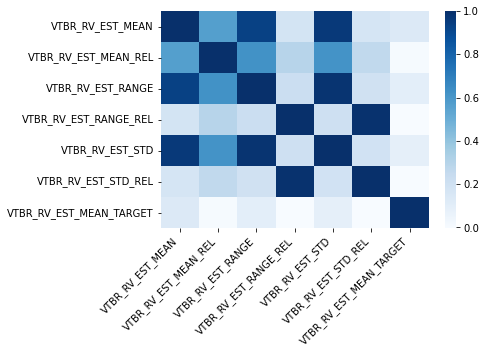

In [282]:
corr = featured_dataset[featured_dataset.columns[featured_dataset.columns.str.startswith('VTBR_RV_EST')]].corr()

ax = sns.heatmap(
    corr, cmap="Blues", annot=False)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [270]:
featured_dataset.iloc[:-1].to_csv('featured_dataset_v2.csv', index=False)

In [298]:
featured_dataset

,TIMESTAMP,AFKS_CHL_bidask_MEAN,AFKS_CHL_bidask_MEAN_REL,AFKS_CHL_bidask_RANGE,AFKS_CHL_bidask_RANGE_REL,AFKS_CHL_bidask_STD,AFKS_CHL_bidask_STD_REL,AFKS_CLOSE_MEAN,AFKS_CLOSE_MEAN_REL,AFKS_CLOSE_RANGE,...,TATN_RV_EST_MEAN_TARGET,TATNP_RV_EST_MEAN_TARGET,TCSG_RV_EST_MEAN_TARGET,TRNFP_RV_EST_MEAN_TARGET,VKCO_RV_EST_MEAN_TARGET,VTBR_RV_EST_MEAN_TARGET,YNDX_RV_EST_MEAN_TARGET,year,month,day
0,201002010,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,...,0.000040,0.000011,NaN,0.000012,NaN,0.000025,NaN,2010,2,1
1,201002011,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,...,0.000035,0.000006,NaN,0.000042,NaN,0.000030,NaN,2010,2,1
2,201002012,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,...,0.000070,0.000063,NaN,0.000063,NaN,0.000009,NaN,2010,2,1
3,201002020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,...,0.000019,0.000032,NaN,0.000035,NaN,0.000022,NaN,2010,2,2
4,201002021,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,...,0.000033,0.000014,NaN,0.000060,NaN,0.000042,NaN,2010,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,202201311,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,...,0.000011,0.000014,0.000019,0.000026,0.000073,0.000014,0.000070,2022,1,31
9062,202201312,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,...,0.000026,0.000022,0.000084,0.000021,0.000341,0.000090,0.000467,2022,1,31
9063,202202010,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,...,0.000046,0.000029,0.000037,0.000014,0.000059,0.000022,0.000056,2022,2,1
9064,202202011,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,...,0.000027,0.000022,0.000043,0.000017,0.000090,0.000027,0.000111,2022,2,1


In [303]:
featured_dataset['year'] = featured_dataset.TIMESTAMP.str[0:4].astype(int)
featured_dataset['month'] = featured_dataset.TIMESTAMP.str[4:6].astype(int)
featured_dataset['day'] = featured_dataset.TIMESTAMP.str[6:8].astype(int)
featured_dataset['weekday'] = pd.to_datetime(featured_dataset[['year', 'month', 'day']]).dt.weekday
featured_dataset['day_period'] = featured_dataset.TIMESTAMP.str[-1].astype(int)
featured_dataset

,TIMESTAMP,AFKS_CHL_bidask_MEAN,AFKS_CHL_bidask_MEAN_REL,AFKS_CHL_bidask_RANGE,AFKS_CHL_bidask_RANGE_REL,AFKS_CHL_bidask_STD,AFKS_CHL_bidask_STD_REL,AFKS_CLOSE_MEAN,AFKS_CLOSE_MEAN_REL,AFKS_CLOSE_RANGE,...,TCSG_RV_EST_MEAN_TARGET,TRNFP_RV_EST_MEAN_TARGET,VKCO_RV_EST_MEAN_TARGET,VTBR_RV_EST_MEAN_TARGET,YNDX_RV_EST_MEAN_TARGET,year,month,day,weekday,day_period
0,201002010,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,...,NaN,0.000012,NaN,0.000025,NaN,2010,2,1,0,0
1,201002011,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,...,NaN,0.000042,NaN,0.000030,NaN,2010,2,1,0,1
2,201002012,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,...,NaN,0.000063,NaN,0.000009,NaN,2010,2,1,0,2
3,201002020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,...,NaN,0.000035,NaN,0.000022,NaN,2010,2,2,1,0
4,201002021,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,...,NaN,0.000060,NaN,0.000042,NaN,2010,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,202201311,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,...,0.000019,0.000026,0.000073,0.000014,0.000070,2022,1,31,0,1
9062,202201312,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,...,0.000084,0.000021,0.000341,0.000090,0.000467,2022,1,31,0,2
9063,202202010,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,...,0.000037,0.000014,0.000059,0.000022,0.000056,2022,2,1,1,0
9064,202202011,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,...,0.000043,0.000017,0.000090,0.000027,0.000111,2022,2,1,1,1


In [304]:
featured_dataset.weekday.value_counts()

1    1821
2    1821
3    1821
4    1809
0    1755
5      36
6       3
Name: weekday, dtype: int64

In [307]:
featured_dataset.drop(featured_dataset.columns[featured_dataset.columns.str.endswith('_TARGET')], axis=1).drop(['year', 'TIMESTAMP'], axis=1)

,AFKS_CHL_bidask_MEAN,AFKS_CHL_bidask_MEAN_REL,AFKS_CHL_bidask_RANGE,AFKS_CHL_bidask_RANGE_REL,AFKS_CHL_bidask_STD,AFKS_CHL_bidask_STD_REL,AFKS_CLOSE_MEAN,AFKS_CLOSE_MEAN_REL,AFKS_CLOSE_RANGE,AFKS_CLOSE_RANGE_REL,...,YNDX_VOL_MEAN,YNDX_VOL_MEAN_REL,YNDX_VOL_RANGE,YNDX_VOL_RANGE_REL,YNDX_VOL_STD,YNDX_VOL_STD_REL,month,day,weekday,day_period
0,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0
1,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,0.563440,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,1
2,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,2
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,0.096219,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,0
4,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,9.816930,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,1.855295,...,11.550805,0.995403,0.538369,0.350883,0.232637,0.365863,1,31,0,1
9062,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,1.002416,...,12.075398,1.045416,1.597880,2.967999,0.639157,2.747444,1,31,0,2
9063,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,0.462761,...,12.561023,1.040216,1.139748,0.713288,0.425679,0.666000,2,1,1,0
9064,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,0.342122,...,11.719402,0.932997,1.056404,0.926875,0.399089,0.937536,2,1,1,1


In [341]:
features_shift1 = featured_dataset.drop(featured_dataset.columns[featured_dataset.columns.str.endswith('_TARGET')], axis=1).drop(['TIMESTAMP'], axis=1)
features_shift1.columns = [''.join(col).strip()+'_SHIFT1' for col in features_shift1.columns.values]

features_shift2 = featured_dataset.drop(featured_dataset.columns[featured_dataset.columns.str.endswith('_TARGET')], axis=1).drop(['year', 'TIMESTAMP'], axis=1).shift(1)
features_shift2.columns = [''.join(col).strip()+'_SHIFT2' for col in features_shift2.columns.values]

features_shift3 = featured_dataset.drop(featured_dataset.columns[featured_dataset.columns.str.endswith('_TARGET')], axis=1).drop(['year', 'TIMESTAMP'], axis=1).shift(2)
features_shift3.columns = [''.join(col).strip()+'_SHIFT3' for col in features_shift3.columns.values]

feature_space_s3 = pd.concat([features_shift1, features_shift2, features_shift3], axis=1)
feature_space_s3

,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_MEAN_SHIFT3,YNDX_VOL_MEAN_REL_SHIFT3,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3
0,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,0.563440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,0.096219,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0
4,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,9.816930,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,1.855295,...,11.812091,0.969906,2.384450,2.615641,0.874558,2.492874,1.0,28.0,4.0,2.0
9062,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,1.002416,...,11.604155,0.982396,1.534325,0.643471,0.635858,0.727062,1.0,31.0,0.0,0.0
9063,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,0.462761,...,11.550805,0.995403,0.538369,0.350883,0.232637,0.365863,1.0,31.0,0.0,1.0
9064,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,0.342122,...,12.075398,1.045416,1.597880,2.967999,0.639157,2.747444,1.0,31.0,0.0,2.0


In [342]:
zero_fill = list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('RANGE_SHIFT2')])+\
list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('STD_SHIFT2')])+\
list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('MEAN_SHIFT2')])+\
list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('RANGE_SHIFT3')])+\
list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('STD_SHIFT3')])+\
list(feature_space_s3.columns[feature_space_s3.columns.str.endswith('MEAN_SHIFT3')])
for col in zero_fill:
    feature_space_s3.loc[:, col].fillna(0, inplace=True)
feature_space_s3.fillna(1, inplace=True)
feature_space_s3.isna().any().any()

False

In [343]:
feature_space_s3[['month_SHIFT1', 'day_SHIFT1', 'day_period_SHIFT1', 'weekday_SHIFT1']]

,month_SHIFT1,day_SHIFT1,day_period_SHIFT1,weekday_SHIFT1
0,2,1,0,0
1,2,1,1,0
2,2,1,2,0
3,2,2,0,1
4,2,2,1,1
...,...,...,...,...
9061,1,31,1,0
9062,1,31,2,0
9063,2,1,0,1
9064,2,1,1,1


In [315]:
feature_space_s3.loc[feature_space_s3.index.isin([0, 2, 2121])]

,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_MEAN_SHIFT1_SHIFT2_SHIFT3,YNDX_VOL_MEAN_REL_SHIFT1_SHIFT2_SHIFT3,YNDX_VOL_RANGE_SHIFT1_SHIFT2_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT1_SHIFT2_SHIFT3,YNDX_VOL_STD_SHIFT1_SHIFT2_SHIFT3,YNDX_VOL_STD_REL_SHIFT1_SHIFT2_SHIFT3,month_SHIFT1_SHIFT2_SHIFT3,day_SHIFT1_SHIFT2_SHIFT3,weekday_SHIFT1_SHIFT2_SHIFT3,day_period_SHIFT1_SHIFT2_SHIFT3
0,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0
2121,0.007051,3.898420,0.003290,3.008741,0.002326,3.008741,3.127462,0.996996,0.001403,0.897346,...,1.0,1.0,1.0,1.0,1.0,1.0,11.0,19.0,0.0,1.0


In [362]:
np.random.seed(2022)
train_ids = np.random.choice(feature_space_s3.index, int(len(feature_space_s3)*0.8), replace=False)
train = feature_space_s3.loc[feature_space_s3.index.isin(train_ids)]
test = feature_space_s3.loc[~feature_space_s3.index.isin(train_ids)]

In [363]:
test['ind'] = test.index.astype('int32')
test = test.drop(test.loc[test.ind.diff()<=3].ind)
test.loc[test.ind.diff()<=3]

C:\Users\tosha\AppData\Local\Temp/ipykernel_12184/3884892108.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_MEAN_REL_SHIFT3,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3,ind


In [364]:
test.ind.diff().describe()

count    914.000000
mean       9.908096
std        5.159481
min        4.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       40.000000
Name: ind, dtype: float64

In [365]:
test_ids = np.random.choice(test.index, int(len(test)*0.5), replace=False)
val = test.loc[test.index.isin(test_ids)]
test = test.loc[~test.index.isin(test_ids)]

In [366]:
val['ind'] = val.index.astype('int32')
val = val.drop(val.loc[val.ind.diff()<=3].ind)
val.loc[val.ind.diff()<=3]

,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_MEAN_REL_SHIFT3,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3,ind


In [367]:
val.ind.diff().describe()

count    456.000000
mean      19.800439
std       14.530970
min        4.000000
25%       10.000000
50%       15.000000
75%       26.000000
max      107.000000
Name: ind, dtype: float64

Убрать все строчки правее тестовых и валидационных на 3

In [368]:
train['ind'] = train.index.astype('int32')
train

C:\Users\tosha\AppData\Local\Temp/ipykernel_12184/3564336338.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_MEAN_REL_SHIFT3,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3,ind
1,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,0.563440,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1
2,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.0,1.0,0.0,0.0,2
5,0.005002,0.789768,0.010005,1.352087,0.007075,2.657068,3.285263,1.000674,0.001198,0.117382,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.0,2.0,1.0,0.0,5
6,0.012984,2.595559,0.007665,0.766112,0.005420,0.766112,3.298588,1.004056,0.005577,4.657177,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.0,2.0,1.0,1.0,6
7,0.002543,0.195889,0.005736,0.748408,0.002583,0.476531,3.298378,0.999936,0.018338,3.287992,...,1.000000,0.000000,1.000000,0.000000,1.000000,2.0,2.0,1.0,2.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,1.855295,...,0.969906,2.384450,2.615641,0.874558,2.492874,1.0,28.0,4.0,2.0,9061
9062,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,1.002416,...,0.982396,1.534325,0.643471,0.635858,0.727062,1.0,31.0,0.0,0.0,9062
9063,0.008578,5.603182,0.006628,0.618488,0.002920,0.720856,3.028778,1.005966,0.012724,0.462761,...,0.995403,0.538369,0.350883,0.232637,0.365863,1.0,31.0,0.0,1.0,9063
9064,0.001511,0.176206,0.002873,0.433480,0.001438,0.492436,3.029059,1.000093,0.004353,0.342122,...,1.045416,1.597880,2.967999,0.639157,2.747444,1.0,31.0,0.0,2.0,9064


In [369]:
len(list(test.ind)+list(val.ind))

915

In [384]:
test = test.iloc[1:]

In [385]:
exclude_indexes = list(test.ind)+list(test.ind+1)+list(test.ind+2)+list(test.ind+3)+list(val.ind)+list(val.ind+1)+list(val.ind+2)+list(val.ind+3)
exclude_indexes.sort()
exclude_indexes

[16,
 17,
 18,
 19,
 24,
 25,
 26,
 27,
 30,
 31,
 32,
 33,
 38,
 39,
 40,
 41,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 57,
 58,
 59,
 60,
 65,
 66,
 67,
 68,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 83,
 84,
 85,
 86,
 91,
 92,
 93,
 94,
 97,
 98,
 99,
 100,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 112,
 118,
 119,
 120,
 121,
 133,
 134,
 135,
 136,
 141,
 142,
 143,
 144,
 147,
 148,
 149,
 150,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 171,
 172,
 173,
 174,
 186,
 187,
 188,
 189,
 199,
 200,
 201,
 202,
 218,
 219,
 220,
 221,
 229,
 230,
 231,
 232,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 254,
 255,
 256,
 257,
 262,
 263,
 264,
 265,
 268,
 269,
 270,
 271,
 274,
 275,
 276,
 277,
 287,
 288,
 289,
 290,
 295,
 296,
 297,
 298,
 304,
 305,
 306,
 307,
 309,
 310,
 311,
 312,
 322,
 323,
 324,
 325,
 339,
 340,
 341,
 342,
 352,
 353,
 354,
 355,
 362,
 363,
 364,
 365,
 374,
 375,
 376,
 377,
 389,
 390,
 391,
 392,
 396,
 397,
 398,
 399,
 427,
 428,
 429,
 

In [387]:
train = train.loc[~train.ind.isin(exclude_indexes)]

In [388]:
print("Доля наблюдений в обучающей выборке:", len(train)/(len(train)+len(test)+len(val)), '\n',
     "Доля наблюдений в валидационной выборке:", len(val)/(len(train)+len(test)+len(val)), '\n',
     "Доля наблюдений в тестовой выборке:", len(test)/(len(train)+len(test)+len(val)))

Доля наблюдений в обучающей выборке: 0.8474123539232054 
 Доля наблюдений в валидационной выборке: 0.07629382303839732 
 Доля наблюдений в тестовой выборке: 0.07629382303839732


In [389]:
train.ind

1          1
2          2
5          5
6          6
7          7
        ... 
9061    9061
9062    9062
9063    9063
9064    9064
9065    9065
Name: ind, Length: 5076, dtype: int64

In [392]:
y_train = featured_dataset.drop(featured_dataset.columns[~featured_dataset.columns.str.endswith('_TARGET')], axis=1).loc[featured_dataset.index.isin(train.ind)]
y_val = featured_dataset.drop(featured_dataset.columns[~featured_dataset.columns.str.endswith('_TARGET')], axis=1).loc[featured_dataset.index.isin(val.ind)]
y_test = featured_dataset.drop(featured_dataset.columns[~featured_dataset.columns.str.endswith('_TARGET')], axis=1).loc[featured_dataset.index.isin(test.ind)]

In [394]:
print(train.shape, y_train.shape)
print(val.shape, y_val.shape)
print(test.shape, y_test.shape)

(5076, 6980) (5076, 43)
(457, 6980) (457, 43)
(457, 6980) (457, 43)


In [395]:
train.to_csv('dataset_v2/X_train.csv', index=False)
val.to_csv('dataset_v2/X_val.csv', index=False)
test.to_csv('dataset_v2/X_test.csv', index=False)
y_train.to_csv('dataset_v2/y_train.csv', index=False)
y_val.to_csv('dataset_v2/y_val.csv', index=False)
y_test.to_csv('dataset_v2/y_test.csv', index=False)

In [49]:
train = pd.read_csv('dataset_v2/X_train.csv')
val = pd.read_csv('dataset_v2/X_val.csv')
test = pd.read_csv('dataset_v2/X_test.csv')

In [50]:
def plot_hists(X1, X2, X3, names, label1, label2, label3):
    fig, axs = plt.subplots(3, 2, figsize=(20, 15))
    for i, column in enumerate(names):
        bins_to_draw = np.min([X1[column].nunique(), X2[column].nunique(), X2[column].nunique()])
        if bins_to_draw<50:
            axs[i//2, i%2].hist(X1[column], bins=bins_to_draw, alpha=0.3, label=label1, color='C0', density=True)
            axs[i//2, i%2].hist(X2[column], bins=bins_to_draw, alpha=0.3, label=label2, color='C1', density=True)
            axs[i//2, i%2].hist(X3[column], bins=bins_to_draw, alpha=0.3, label=label3, color='C2', density=True)
        else:
            axs[i//2, i%2].hist(X1[column], bins=20, alpha=0.3, label=label1, color='C0', density=True)
            axs[i//2, i%2].hist(X2[column], bins=20, alpha=0.3, label=label2, color='C1', density=True)
            axs[i//2, i%2].hist(X3[column], bins=20, alpha=0.3, label=label3, color='C2', density=True)
        axs[i//2, i%2].set_title(column)
        axs[i//2, i%2].legend(loc='best')
    axs[0, 0].title.set_text('Гистограмма распределения выборок по годам')
    axs[0, 1].title.set_text('Гистограмма распределения выборок по месяцам')
    axs[1, 0].title.set_text('Гистограмма распределения выборок по дням месяца')
    axs[1, 1].title.set_text('Гистограмма распределения выборок по дням недели')
    axs[2, 0].title.set_text('Гистограмма распределения выборок по периодам внутри дня')
    fig.delaxes(axs.flatten()[-1])
    plt.tight_layout()

names = ['year_SHIFT1', 'month_SHIFT1', 'day_SHIFT1', 'weekday_SHIFT1', 'day_period_SHIFT1']

In [51]:
np.max([train['weekday_SHIFT1'].nunique(), val['weekday_SHIFT1'].nunique(), test['weekday_SHIFT1'].nunique()])

7

In [52]:
train.loc[train.weekday_SHIFT1==6, 'weekday_SHIFT1'] = 5

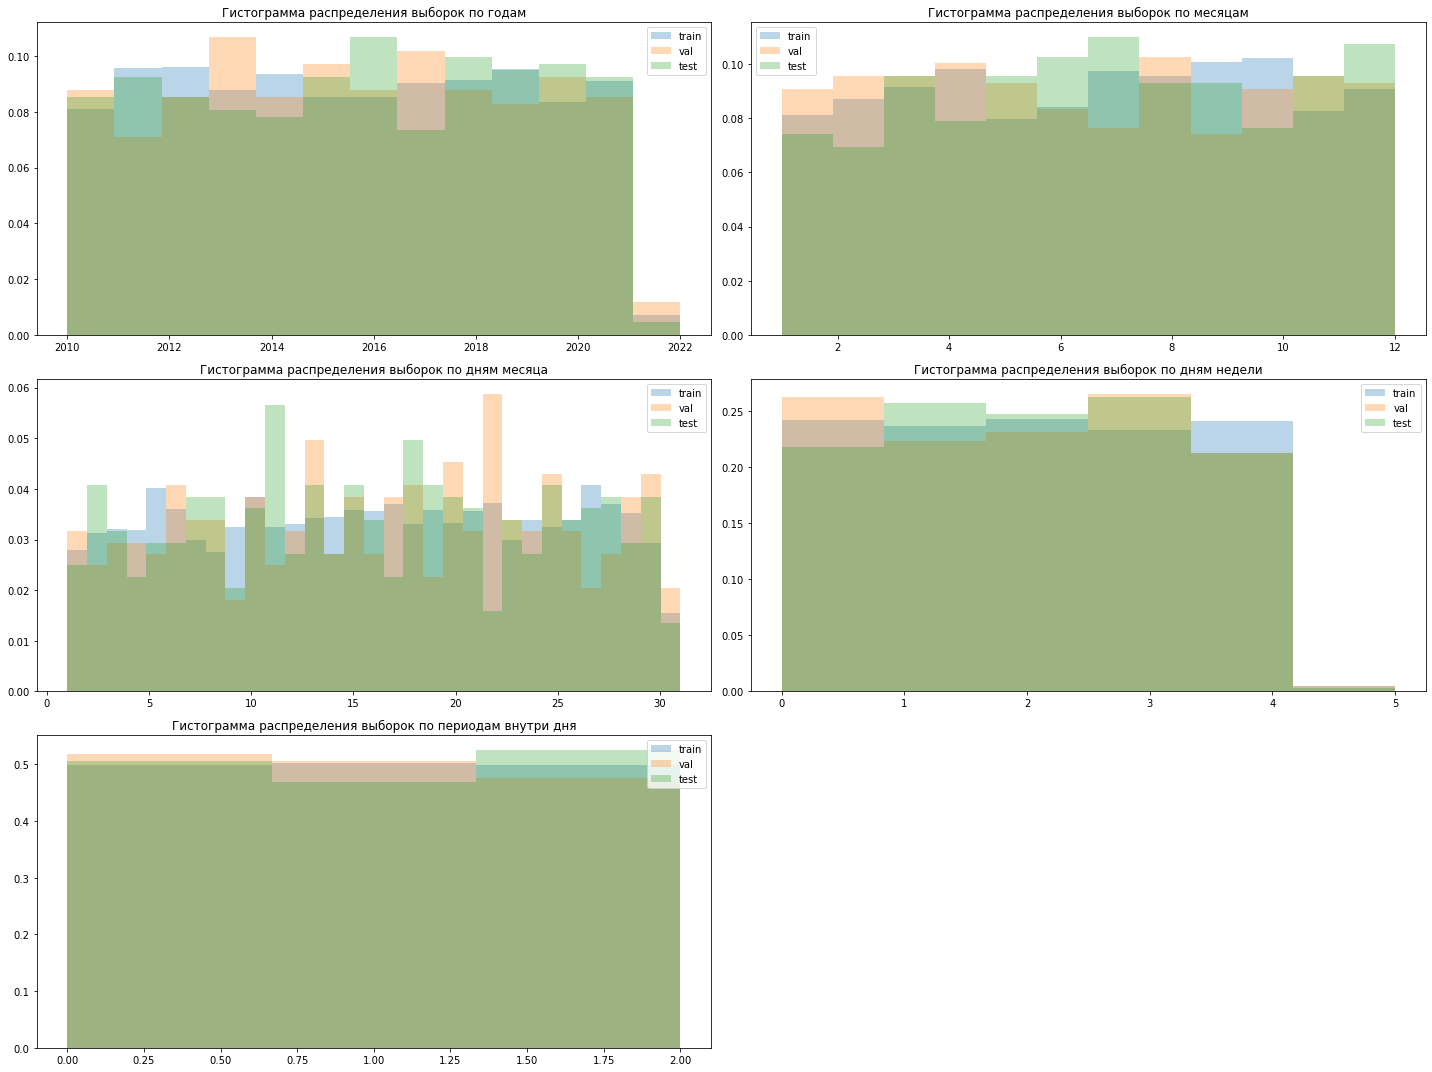

In [53]:
plot_hists(train, val, test, names, label1="train", label2="val", label3='test')

In [70]:
data.drop_duplicates(['TICKER', 'TIMESTAMP'])

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL,YEAR,MONTH,DAY,HOUR,TIMESTAMP,WEEKDAY,REVENUE,RV_EST,HL_bidask,CHL_bidask
0,AFKS,2010-02-01,3.292832,3.298463,3.285188,3.298463,10.700995,2010.0,2.0,1.0,11,20102111,0,0.005631,0.000078,0.000000,0.000000
1,AFKS,2010-02-01,3.291010,3.293983,3.280911,3.285749,10.618885,2010.0,2.0,1.0,12,20102112,0,-0.005261,0.000076,0.365935,0.017102
2,AFKS,2010-02-01,3.285749,3.295800,3.284289,3.292089,11.596347,2010.0,2.0,1.0,13,20102113,0,0.006340,0.000051,0.366737,0.005401
3,AFKS,2010-02-01,3.292052,3.292052,3.287282,3.288029,9.560997,2010.0,2.0,1.0,14,20102114,0,-0.004023,0.000005,0.366680,0.004451
4,AFKS,2010-02-01,3.288029,3.290266,3.284926,3.284926,11.930319,2010.0,2.0,1.0,15,20102115,0,-0.003103,0.000011,0.366963,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973449,YNDX,2022-02-01,8.219003,8.232599,8.216628,8.220673,11.682364,2022.0,2.0,1.0,20,20222120,1,0.001670,0.000129,0.364110,0.000000
973450,YNDX,2022-02-01,8.220403,8.220726,8.211483,8.217978,11.402027,2022.0,2.0,1.0,21,20222121,1,-0.002424,0.000041,0.364297,0.000000
973451,YNDX,2022-02-01,8.217762,8.224003,8.210668,8.212893,11.437048,2022.0,2.0,1.0,22,20222122,1,-0.004869,0.000082,0.367052,0.002197
973452,YNDX,2022-02-01,8.212731,8.214898,8.209798,8.211429,10.998594,2022.0,2.0,1.0,23,20222123,1,-0.001303,0.000013,0.366055,0.000000


In [67]:
data.groupby(['TIMESTAMP', 'TICKER']).REVENUE.count()

TIMESTAMP  TICKER
201010111  AFKS      1
           AFLT      1
           CHMF      1
           FEES      1
           GAZP      1
                    ..
2022219    TCSG      1
           TRNFP     1
           VKCO      1
           VTBR      1
           YNDX      1
Name: REVENUE, Length: 936801, dtype: int64

In [72]:
data.drop_duplicates(['TICKER', 'TIMESTAMP']).pivot(index='TIMESTAMP', columns='TICKER', values=['REVENUE', 'RV_EST', 'HL_bidask', 'CHL_bidask']).to_excel('gretl_data.xlsx')

In [73]:
data.drop_duplicates(['TICKER', 'TIMESTAMP']).fillna(0).pivot(index='TIMESTAMP', columns='TICKER', values='REVENUE').to_excel('revenue_data.xlsx')

0.9861174744774792


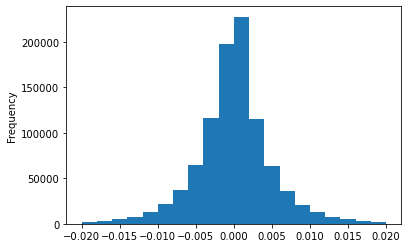

In [84]:
data.loc[(data.REVENUE>-0.02) & (data.REVENUE<0.02)].REVENUE.plot.hist(bins=20)
print(len(data.loc[(data.REVENUE>-0.02) & (data.REVENUE<0.02)].REVENUE)/len(data))